In [1]:
%pip install matplotlib numpy scipy --quiet

Note: you may need to restart the kernel to use updated packages.


# 1. Introduction
- **Problem Statement:** Random variables serve as an essential quantitative bridge in data science. They fulfill two core functions:
  - Data Mapping: They map abstract experimental outcomes into concrete numerical values, enabling the application of analytical mathematics.
  - Managing Uncertainty: They facilitate the summarization of complex data behaviors using concise summary statistics (such as mean and variance) rather than requiring the interpretation of entire probability distributions.
- **Applications in Computer Science:** 
   - *Computer Vision and Time Series Analysis*: Use Joint Density Functions.
   - *Risk Assessment and Algorithm Stability*: Use Variance and Standard Deviation.
   - *Performance Guarantees and Error Bounds*: Use Chebyshev’s Inequality.
   - *Large-Scale Data Modeling*: Use Probability Density Functions (PDF).

# 2. Probability Density Function - PDF
## 2.1 Definition: The Formula
The **Probability density function** (PDF) of a ***Continuous random variable*** X is a function that associates a probability with each range of realizations of X, denoted as $p(x)$. <sup>[2]</sup>

The probability of $X$ is: <sup>[1]</sup>

$$\boxed{P( X \in (a, b])=\int_{a}^{b} p(x) \,dx.}\tag{22.6.9}$$

## 2.2 Step-by-step Computation
### Step 1: From Discrete to Continuous
##### Step 1.1: Formulate the problem
- Suppose we measure the height of all adult males in a population:
  - Random Variable $X$: The height of a randomly selected person.
  - Characteristics: Height is a continuous variable. A person is not just exactly 170cm or 171cm tall, but could be 170.5cm, 170.53cm, etc.
- Objective: We want to calculate the probability (percentage of people) whose height falls within a tiny interval from $x$ to $x+\epsilon$.
##### Step 1.2: Geometric Visualization
Please look at the illustration below:

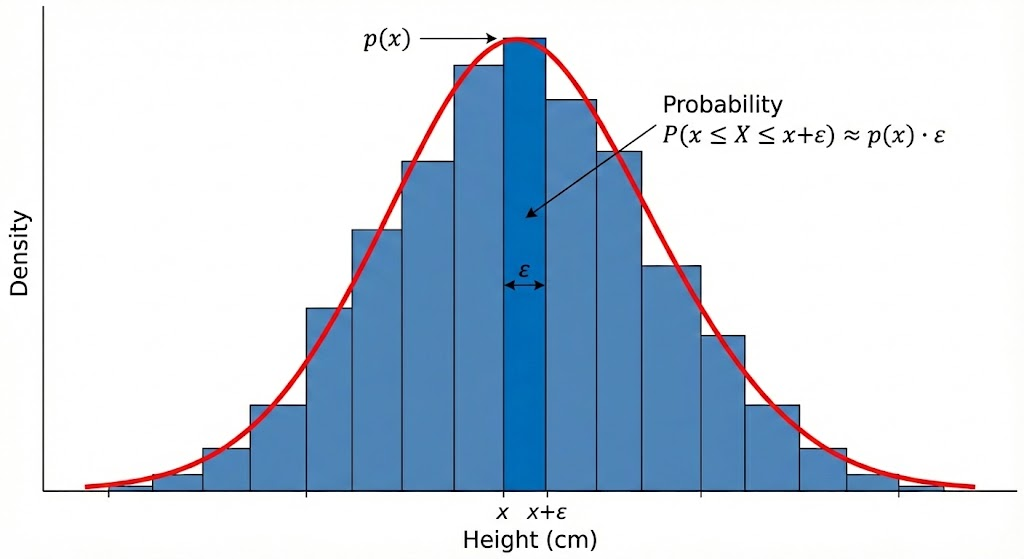

- Blue Bars: Represent the actual data (the proportion of people falling into specific height intervals).
- Red Curve: The probability density function $p(x)$. This function represents the probability density at point $x$.

Consider the strip located at position $x$ in the illustration:
- When the width $\epsilon$ is sufficiently small, the curve $p(x)$ in this region changes negligibly. We consider the density from one end to the other to be flat and constant.
  $$\text{Density in this interval} \approx p(x)\tag{2.2.1}$$
- We apply a basic physical principle:
  $$\text{Total Quantity} = \text{Density} \times \text{Size}\tag{2.2.2}$$
    - Total Quantity: The probability we seek, $P(x \le X \le x + \epsilon)$.
    - Density: The value of the density function $p(x)$.
    - Size: The width of the interval $\epsilon$.
##### Step 1.3: Conclusion
Substituting these quantities into the equation above, we obtain:
$$P(x \le X \le x + \epsilon) \approx p(x) \cdot \epsilon.\tag{2.2.3}$$
### Step 2: Partitioning
Imagine the large interval from $a$ to $b$ is a long loaf of bread. To calculate the total, we slice this interval into $N$ equal, thin slices.
- The width of each slice is $\Delta x$ (let's denote this as $\epsilon$).
- The division points are: 
   - $x_0, x_1, x_2, ..., x_N$.
   - $x_0 = a$
   - $x_N = b$
### Step 3: Discrete Summation
The probability of the random variable $X$ falling into the large interval $[a, b]$ is simply the sum of the probabilities of it falling into each individual small slice (since these slices are disjoint).
$$P(a \le X \le b) \approx \sum_{i=0}^{N-1} P(x_i \le X \le x_i + \epsilon).\tag{2.2.4}$$
### Step 4: Substitution
For each slice $i$ (starting at $x_i$), apply formula $(2.2.3)$, we have: 
$$P(a \le X \le b) \approx \sum_{i=0}^{N-1} p(x_i) \cdot \epsilon.\tag{2.2.5}$$
### Step 5: The Limit (Transition to Calculus)
We let the number of slices $N$ approach infinity ($N \to \infty$), which means the width of each slice $\epsilon$ approaches zero ($\epsilon \to 0$).

According to the Definition of the Riemann Integral: The limit of a sum of infinitely small rectangles ($p(x) \cdot \epsilon$) is defined as the Definite Integral.

Mathematically:
- The approximation $\approx$ becomes equality $=$.
$$P(a \le X \le b) = \lim_{\epsilon \to 0} \sum_{i=0}^{N-1} p(x_i) \cdot \epsilon.\tag{2.2.6}$$
- The summation symbol $\sum$ becomes the integral symbol $\int$.
- The finite width $\epsilon$ becomes the differential $dx$.
$$\lim_{\epsilon \to 0} \sum_{i=0}^{N-1} p(x_i) \cdot \epsilon = \int_a^b p(x) dx.\tag{2.2.7}$$
Thus, we have proven that:
$$P(a \le X \le b) = \int_a^b p(x) dx.\tag{Q.E.D.}$$

## 2.3 Concrete Example
### 2.3.1 The Problem: "Timing the Commute": 
**Scenario**: Every day, you ride your motorbike to work. Your travel time is a continuous random variable $X$ (minutes). Due to varying traffic conditions, this time follows a Normal Distribution with:
- Mean ($\mu$): 30 minutes.
- Standard Deviation ($\sigma$): 2 minutes (meaning most days take between 28 and 32 minutes).

**Requirement**: Your boss is very strict. They defined a "Golden Window" for clocking in: you must arrive exactly between 28 minutes and 32 minutes after departure.
- If you arrive earlier than 28m: You lose sleep (inefficient).
- If you arrive later than 32m: You are penalized for being late.

**Question**: What is the probability that your commute today falls exactly within this "Golden Window"?
### 2.3.2 Mathematical Solution (Theory): 
We need to calculate the probability:
$$P(28 \le X \le 32).\tag{2.3.1}$$
According to the integral formula of the probability density function (PDF):
$$P = \int_{28}^{32} p(x) dx.\tag{2.3.2}$$
Where $p(x)$ is the PDF of the normal distribution:
$$p(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}.\tag{2.3.3}$$
## 2.4 Python Implementation


--- RESULTS ---
Time Interval: 28 - 32 minutes
Calculated Probability (Code): 0.6827


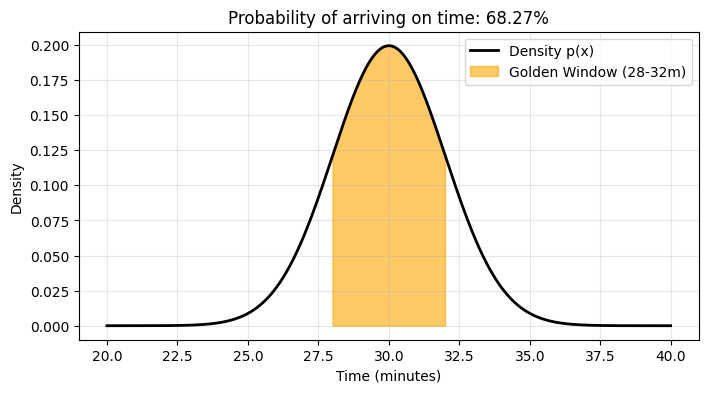

In [2]:
import numpy as np  
import math
import matplotlib.pyplot as plt

# --- 1. DATA SETUP ---
mu = 30.0       # Mean: 30 minutes
sigma = 2.0     # Std Dev: 2 minutes

# Slice the time axis into ultra-thin strips
# We scan from minute 20 to 40 to cover the bell curve
epsilon = 0.01  # Each strip is 0.01 minutes wide
x = np.arange(20, 40, epsilon)

# --- 2. CALCULATE DENSITY FUNCTION p(x) ---
# Normal Distribution PDF Formula
# p = (1 / (sigma * sqrt(2pi))) * e^(-(x-mu)^2 / 2sigma^2)
coef = 1 / (sigma * math.sqrt(2 * math.pi))
exponent = -0.5 * ((x - mu) / sigma)**2
p = coef * np.exp(exponent)

# --- 3. SOLVE THE PROBLEM (CALCULATE PROBABILITY) ---
# Define the "Golden Window": from 28 to 32 minutes
target_start = 28
target_end = 32

# Find corresponding indices in array x
# Formula: (value - start_point) / step_size
idx_start = int((target_start - 20) / epsilon)
idx_end = int((target_end - 20) / epsilon)

# Slice the density array to get only the "Golden Window" part
p_target = p[idx_start:idx_end]

# CALCULATE TOTAL AREA (Riemann Sum)
# P ≈ Sum( epsilon * p(x) )
probability = np.sum(epsilon * p_target)

# --- 4. DISPLAY RESULTS ---
print(f"--- RESULTS ---")
print(f"Time Interval: {target_start} - {target_end} minutes")
print(f"Calculated Probability (Code): {probability:.4f}")

# Visualization
plt.figure(figsize=(8, 4))
plt.plot(x, p, 'black', linewidth=2, label='Density p(x)')
# Shade the "Golden Window"
plt.fill_between(x[idx_start:idx_end], p_target, color='orange', alpha=0.6, label='Golden Window (28-32m)')
plt.title(f"Probability of arriving on time: {probability*100:.2f}%")
plt.xlabel("Time (minutes)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Cumulative Distribution Functions - CDF
## 3.1 Definition: The Formula
The **Cumulative Distribution Function** (CDF), denoted as $F(x)$, is the function representing the total cumulative probability from negative infinity ($-\infty$) up to the point $x$. <sup>[2]</sup>

Mathematically, the CDF is defined through its relationship with the Probability Density Function, $p(x)$, as follows: <sup>[1]</sup>
$$\boxed{F(x) = P(X \le x) = \int_{-\infty}^{x} p(x) \, dx.\tag{22.6.12}}$$
## 3.2 Step-by-step Computation
#### Step 1: Starting from the meaning of the event $X \le x$
When we write $P(X \le x)$, we are asking: "What is the total probability that the random variable falls anywhere to the left of point $x$?"Set-theoretically, the event $\{X \le x\}$ is equivalent to $X$ lying in the interval from negative infinity to $x$:
$$X \in (-\infty, x]$$
#### Step 2: Slicing the interval
To calculate the probability of the large interval $(-\infty, x]$, we divide it into infinitely many tiny, disjoint intervals.
Let $t$ be the running variable along the horizontal axis. Each small interval at position $t$ has a width of $dt$ (or $\epsilon$).
According to the approximation formula $(2.2.3)$ we have proven:
$$\text{Probability of the small slice at } t \approx p(t) \cdot dt.\tag{3.2.1}$$
#### Step 3: Accumulation
Because these small slices are disjoint (mutually exclusive), the total probability of the large interval equals the sum of the probabilities of the individual small slices added together.$$P(X \le x) \approx \sum_{t=-\infty}^{x} \left( \text{Probability of the small slice at } t \right).\tag{3.2.2}$$

$$P(X \le x) \approx \sum_{t=-\infty}^{x} p(t) \cdot dt.\tag{3.2.3}$$

$$P(X \le x) \approx \sum_{t=-\infty}^{x} p(x) \cdot dx.\tag{3.2.4}$$

#### Step 4: Transition to Integration
As the width $dx \to 0$, the summation sign ($\sum$) becomes the integral sign ($\int$):
$$P(X \le x) = \int_{-\infty}^{x} p(x) \, dx.\tag{3.2.5}$$
And by notational definition, we name this function $F(x)$.Therefore:
$$F(x) = P(X \le x) = \int_{-\infty}^{x} p(x) \, dx.\tag{Q.E.D.}$$
## 3.3 Concrete Example
**Scenario:** "Phone Charging Time"
Assume that the time required to fully charge a phone ($X$) follows a normal distribution with:
- Mean ($\mu$) = 60 minutes.
- Standard Deviation ($\sigma$) = 5 minutes.
  
We have the Cumulative Distribution Function (CDF), $F(x)$, which indicates the probability that charging is completed within $x$ minutes.

**Question:** What is the probability that the phone finishes charging in under 60 minutes? By definition: $P(X \le 60) = F(60)$.
## 3.4 Python Implementation


Calculation result: P(X <= 60) = 0.5


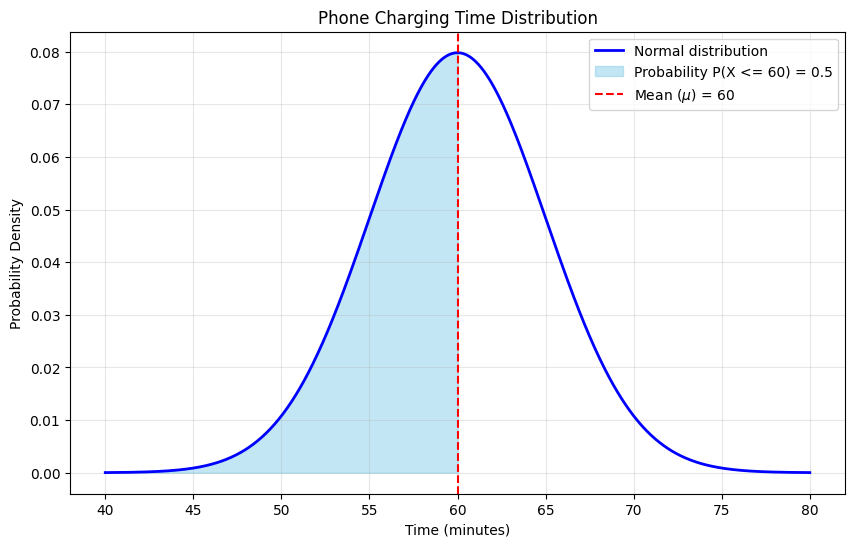

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Declare parameters
mu = 60       # Mean (minutes)
sigma = 5     # Standard deviation (minutes)
x_target = 60 # Value to calculate probability for

# 2. Calculate probability P(X <= 60) using the CDF function
# norm.cdf(x, loc, scale) calculates the area to the left of point x
probability = stats.norm.cdf(x_target, loc=mu, scale=sigma)

print(f"Calculation result: P(X <= {x_target}) = {probability}")

# 3. Plot visualization
# Create x-axis data (from -4 sigma to +4 sigma to cover the entire graph)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma) # Probability Density Function (PDF)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='Normal distribution')

# Shade the area corresponding to P(X <= 60)
x_fill = np.linspace(mu - 4*sigma, x_target, 1000)
y_fill = stats.norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.5, label=f'Probability P(X <= 60) = {probability}')

# Line at the mean
plt.axvline(x=mu, color='red', linestyle='--', label=rf'Mean ($\mu$) = {mu}')
plt.title('Phone Charging Time Distribution')
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Means
## 4.1 Definition: The Formula
In probability theory, the Mean (or Expectation), often denoted as $\mu$ or $E[X]$, represents the weighted average of a random variable if the experiment is repeated many times <sup>[2]</sup>. The calculation depends on the type of random variable:
- **Discrete Random Variable:** The expectation is the sum of the product of each value and its corresponding probability <sup>[1]</sup>:
  $$\mu_X=E[X] = \sum_{x} x_i \cdot p_i.\tag{22.6.14}$$
  Where X is a discrete random variable and takes the values $x_i$ with probabilities $p_i$. 
- **Continuous Random Variable:** The expectation is the integral of the product of the value and the probability density function <sup>[2]</sup>:
  $$\boxed{\mu_X= E[X] = \int_{-\infty}^{\infty} x \cdot p(x) \, dx.\tag{22.6.23}}$$
  Where $p(x)$ is the probability density function (PDF).
## 4.2 Step-by-step Computation
Expectation has two important properties that simplify calculations: Linearity and ESSE (Sum of Expectations).
### 4.2.1 Linearity of Expectation:
For any random variable $X$ and numbers $a$ and $b$, we have that <sup>[1]</sup>: $$E[aX + b] = aE[X] + b.\tag{4.2.1}$$
#### Step 1: Apply the definition of expectation for the new random variable $Y = aX + b$:
$$E[aX + b] = \sum_{x} (ax + b)p(x).\tag{4.2.1.1}$$
#### Step 2: Distribute the probability $p(x)$ inside the parentheses:
$$E[aX + b] = \sum_{x} (ax \cdot p(x) + b \cdot p(x)).\tag{4.2.1.2}$$
#### Step 3: Split the sum into two separate sums (commutative property of addition):
$$E[aX + b] = \sum_{x} ax \cdot p(x) + \sum_{x} b \cdot p(x).\tag{4.2.1.3}$$
#### Step 4: Factor the constants $a$ and $b$ out of the sums:
$$E[aX + b] = a \underbrace{\sum_{x} x \cdot p(x)}_{E[X]} + b \underbrace{\sum_{x} p(x)}_{1}.\tag{4.2.1.4}$$
#### Step 5: Conclusion *(since the total probability $\sum p(x) = 1$)*:
$$E[aX + b] = aE[X] + b.\tag{Q.E.D.}$$
### 4.2.2 ESSE (Expectations of Summations are Summations of Expectations):
The expectation of a sum is equal to the sum of the expectations <sup>[1]</sup><sup>[2]</sup>: $$E[X + Y] = E[X] + E[Y].\tag{4.2.2}$$
Notably, this property holds even if the variables $X$ and $Y$ are dependent.
#### Step 1: By the definition of expectation for a function of two variables $f(x,y)$:
$$E[X + Y] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (x + y) p(x, y) \, dx \, dy.\tag{4.2.2.1}$$
#### Step 2: Split the integral: We utilize concepts from ***Integral Calculus*** discussed in previous sections <sup>[1]:Sec.22.5</sup>.
$$E[X + Y] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (x + y) p(x, y) \, dx \, dy = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} x p(x, y) dx dy + \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} y p(x, y) dx dy .\tag{4.2.2.2}$$
#### Step 3: Change the order of integration and group variables (Fubini's Theorem):
$$E[X + Y] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} x p(x, y) dx dy + \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} y p(x, y) dx dy = \int x \underbrace{\left(\int p(x, y) dy\right)}_{p_X(x)} dx + \int y \underbrace{\left(\int p(x, y) dx\right)}_{p_Y(y)} dy.\tag{4.2.2.3}$$
#### Step 4: Conclusion: 
$$E[X + Y] = \int_{-\infty}^{\infty} x p_X(x) dx + \int_{-\infty}^{\infty} y p_Y(y) dy.\tag{4.2.2.4}$$
$$E[X + Y] = E[X] + E[Y]\tag{Q.E.D.}$$
## 4.3 Concrete Example
Consider the problem of rolling a fair 6-sided die.
- Example 1 (Linearity): Roll 1 die ($X$). Calculate the expectation of the result doubled plus one ($2X+1$).
   - $E[X] = \sum x \cdot p(x) = 1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} + 3 \cdot \frac{1}{6} + 4 \cdot \frac{1}{6} + 5 \cdot \frac{1}{6} + 6 \cdot \frac{1}{6} = 3.5 $.
   - $E[2X+1] = 2\cdot(3.5) + 1 = 8$.
- Example 2 (ESSE): Roll 2 dice ($X_1, X_2$). Calculate the expectation of the sum of points ($S = X_1 + X_2$).
   - $E[S] = E[X_1] + E[X_2] = 3.5 + 3.5 = 7$.
## 4.4 Python Implementation


In [4]:
import numpy as np

def demonstration_means():
    print("=== 1. LINEARITY DEMONSTRATION ===")
    # Create sample space and probability for 1 die
    x = np.arange(1, 7, dtype=np.float32)
    p = np.ones(6, dtype=np.float32) / 6

    # Calculate E[X]
    mean_x = np.sum(x * p)
    print(f"Expectation E[X]: {mean_x}")

    # Calculate E[2X + 1] in 2 ways
    # Method 1: Transform the random variable then calculate mean
    y = 2 * x + 1
    mean_y_direct = np.sum(y * p)
    # Method 2: Use the linear formula a*E[X] + b
    mean_y_formula = 2 * mean_x + 1

    print(f"E[2X + 1] (Direct calculation): {mean_y_direct}")
    print(f"E[2X + 1] (Formula):            {mean_y_formula}")

    print("\n=== 2. ESSE (SUM OF EXPECTATIONS) DEMONSTRATION ===")
    # Create joint distribution for 2 dice (36 outcomes)
    x1 = np.arange(1, 7, dtype=np.float32)
    x2 = np.arange(1, 7, dtype=np.float32)
    
    # Create a grid of all possible pairs (x1, x2)
    X1_grid, X2_grid = np.meshgrid(x1, x2, indexing='ij')

    # Probability for each pair (x1, x2) is 1/36
    p_joint = np.ones((6, 6), dtype=np.float32) / 36

    # Calculate E[X1 + X2] directly from Joint Distribution
    S = X1_grid + X2_grid
    mean_sum_direct = np.sum(S * p_joint)

    # Calculate E[X1] + E[X2] (ESSE Formula)
    mean_sum_formula = mean_x + mean_x # E[X1] = E[X2] = 3.5

    print(f"E[X1 + X2] (From Joint PDF): {mean_sum_direct}")
    print(f"E[X1] + E[X2] (ESSE Formula): {mean_sum_formula}")

if __name__ == "__main__":
    demonstration_means()

=== 1. LINEARITY DEMONSTRATION ===
Expectation E[X]: 3.5
E[2X + 1] (Direct calculation): 8.0
E[2X + 1] (Formula):            8.0

=== 2. ESSE (SUM OF EXPECTATIONS) DEMONSTRATION ===
E[X1 + X2] (From Joint PDF): 7.0
E[X1] + E[X2] (ESSE Formula): 7.0


# 5. Variances
## 5.1 Definition: The Formula
While the Mean tells us the central location of a distribution, the Variance, denoted as $\text{Var}(X)$ or $\sigma^2$, measures the degree of dispersion (or spread) of the values around that mean<sup>[1]</sup>.

Mathematically, variance is defined as the expectation of the squared deviation from the mean:
$$\boxed{\sigma^2=\text{Var}(X) = E[(X - \mu_X)^2]= E[X^2] - \mu_X^2.}\tag{22.6.16}$$
Where $\mu = E[X]$ is the expectation of the random variable $X$. 
## 5.2 Step-by-step Computation
We will prove three important properties of variance: the Computational Formula, the Linear Transformation property, and the Sum of Variances property (for independent variables).
### 5.2.1 Computational Formula: 
Instead of calculating the average of every squared deviation, we use a faster formula: <sup>[1]</sup>
$$\text{Var}(X) =E[(X - \mu_X)^2]= E[X^2] - \mu_X^2= E[X^2] - (E[X])^2\tag{5.2.1}$$
#### Step 1: Start with the definition from Formula $(22.6.16)$:
$$\text{Var}(X) = E[(X - \mu_X)^2]$$
#### Step 2: Expand the squared term inside the parentheses:
$$\text{Var}(X) = E[X^2 - 2X\mu_X + \mu_X^2]\tag{5.2.1.1}$$
#### Step 3: Apply the linearity of expectation form Formula $(4.2.2)$:
$$\text{Var}(X) = E[X^2 - 2X\mu_X + \mu_X^2] = E[X^2] - E[2X\mu_X] + E[\mu_X^2]\tag{5.2.1.2}$$
#### Step 4: Since $\mu$ is a constant, we move it outside the expectation: $E[\mu_X^2]=\mu_X^2$
$$\text{Var}(X) =  E[X^2] - E[2X\mu_X] + E[\mu_X^2] = E[X^2] - E[2X\mu_X] + \mu_X^2\tag{5.2.1.3}$$
#### Step 5: Apply the Formula $(4.2.1)$:
$$\text{Var}(X) = E[X^2] - E[2X\mu_X] + \mu_X^2 = E[X^2] - 2\mu_X E[X] + \mu_X^2\tag{5.2.1.4}$$
#### Step 6: Substitute $E[X]$ with $\mu$:
$$\text{Var}(X) = E[X^2] - 2\mu_X(\mu_X) + \mu_X^2\tag{5.2.1.5}$$
$$\text{Var}(X) = E[X^2] - 2\mu_X^2 + \mu_X^2\tag{5.2.1.6}$$
#### Step 7: Simplify:
$$\text{Var}(X) = E[X^2] - \mu_X^2 = E[X^2] - (E[X])^2.\tag{Q.E.D.}$$
### 5.2.2 Linear Transformation Property: 
For any random variable $X$ and numbers $a$ and $b$,  we have that <sup>[1]</sup> :
$$\text{Var}(aX + b) = a^2 \text{Var}(X)\tag{5.2.2}$$
#### Step 1: Apply the Formula $(5.2.1)$:
$$\text{Var}(aX + b) = E[(aX + b)^2] - (E[(aX + b)])^2\tag{5.2.2.1}$$
#### Step 2: $E[(aX + b)^2]$ expansion:
$$E[(aX + b)^2] = E[a^2\cdot X^2 + 2abX+ b^2]\tag{5.2.2.2}$$
Apply the Formula $(4.2.2)$: $$E[(aX + b)^2] = E[a^2\cdot X^2 + 2abX+ b^2] = E[a^2\cdot X^2]+E[2abX]+E[b^2]\tag{5.2.2.3}$$
Since $b$ is a constant, we move it outside the expectation: $E[b^2]=b^2$ and apply the Formula $(4.2.1)$, we have:
$$E[(aX + b)^2] = E[a^2\cdot X^2]+E[2abX]+E[b^2] = a^2E[X^2]+2ab\cdot E[X] +b^2 \tag{5.2.2.4}$$
#### Step 3: $(E[(aX + b)])^2$ expansion:
Apply the Formula $(4.2.1)$ and $(4.2.2)$: $$(E[(aX + b)])^2 = (aE[X]+E[b])^2\tag{5.2.2.5}$$
$$(aE[X]+E[b])^2 = a^2(E[X])^2 + 2a\cdot E[b]\cdot E[X]+ (E[b])^2\tag{5.2.2.6}$$
Since $b$ is a constant, we move it outside the expectation: $E[b]=b$, we have: 
$$(E[(aX + b)])^2 = a^2(E[X])^2 + 2a\cdot E[b]\cdot E[X]+ (E[b])^2 = a^2(E[X])^2 + 2ab\cdot E[X]+ b^2 \tag{5.2.2.7}$$
#### Step 4: From the Formula $(5.2.2.4)$ and $(5.2.2.7)$, we have:
$$\text{Var}(aX + b) = E[(aX + b)^2] - (E[(aX + b)])^2 = a^2E[X^2] - a^2(E[X])^2 \tag{5.2.2.8}$$
$$\text{Var}(aX + b) = a^2E[X^2] - a^2(E[X])^2 = a^2\cdot [E[X^2] -(E[X])^2]  \tag{5.2.2.9}$$
#### Step 5: Conclusion:
From the Formula $(5.2.1)$, we have: $\text{Var}(X) = E[X^2] -(E[X])^2 $
From that we can deduce that:
$$\text{Var}(aX + b) = a^2E[X^2] - a^2(E[X])^2 = a^2\cdot [E[X^2] -(E[X])^2] = a^2\text{Var}(X)  \tag{Q.E.D.}$$

### 5.2.3 Variances of Summations:
If we have two independent random variables $X$ and $Y$, we have: <sup>[1]</sup>
$$\text{Var}(X+Y)=\text{Var}(X) + \text{Var}(Y) \tag{5.2.3}$$
#### Step 1: Apply the Formula $(5.2.1)$:
$$\text{Var}(X+Y) = E[(X+Y)^2] - (E[(X+Y)])^2\tag{5.2.3.1}$$
#### Step 2: $E[(X+Y)^2]$ expansion:
$$E[(X+Y)^2] = E[X^2 + 2XY+ Y^2]\tag{5.2.3.2}$$
Apply the Formula $(4.2.1)$ and $(4.2.2)$: $$E[(X+Y)^2] = E[X^2 + 2XY+ Y^2] = E[X^2]+2E[XY]+E[Y^2]\tag{5.2.3.3}$$
Since $X, Y$ are independent, we have: $2E[XY] = 0$
Thus: $$E[(X+Y)^2] =  E[X^2] +E[Y^2]\tag{5.2.3.4}$$
#### Step 3: $(E[(X+Y)])^2$ expansion:
Apply the Formula $(4.2.1)$ and $(4.2.2)$: $$(E[(X+Y)])^2 = (E[X])^2 + 2E[X]\cdot E[Y]+ (E[Y])^2\tag{5.2.3.5}$$
Since $X, Y$ are independent, we have: $2E[X]\cdot E[Y] = 0$
Thus: $$(E[(X+Y)])^2 = (E[X])^2 + (E[Y])^2\tag{5.2.3.6}$$
#### Step 4: From the Formula $(5.2.3.4)$ and $(5.2.3.6)$, we have:
$$\text{Var}(X+Y) = E[(X+Y)^2] - (E[(X+Y)])^2 = E[X^2] +E[Y^2] - (E[X])^2 - (E[Y])^2 = [E[X^2]- (E[X])^2]+[E[Y^2]- (E[Y])^2]. \tag{5.2.3.7}$$
#### Step 5: Conclusion:
From the Formula $(5.2.1)$, we have: $\text{Var}(X) = E[X^2] -(E[X])^2 $

From that we can deduce that:
$$\text{Var}(X+Y)= [E[X^2]- (E[X])^2]+[E[Y^2]- (E[Y])^2] =\text{Var}(X) + \text{Var}(Y)\tag{Q.E.D.}$$
## 5.3 Concrete Example
Consider again the example of rolling a fair 6-sided die ($X \in \{1, ..., 6\}$). 
We already know $E[X] = 3.5$. Let's calculate the variance $\text{Var}(X)$.

Step 1: Calculate the expectation of $X^2$ ($E[X^2]$)

The random variable $X^2$ takes values $\{1^2, 2^2, ..., 6^2\}$ with equal probability of $1/6$.
$$E[X^2] = \sum x^2 \cdot p(x)$$
$$E[X^2] = \frac{1}{6}(1^2 + 2^2 + 3^2 + 4^2 + 5^2 + 6^2)$$
$$E[X^2] = \frac{1}{6}(1 + 4 + 9 + 16 + 25 + 36)$$
$$E[X^2] = \frac{91}{6} \approx 15.167$$
Step 2: Apply the variance formula
$$\text{Var}(X) = E[X^2] - (E[X])^2$$
$$\text{Var}(X) = \frac{91}{6} - (3.5)^2= \frac{35}{12} \approx 2.917$$
Thus, the variance of the die is approximately 2.917.
## 5.4 Python Implementation


In [5]:
import numpy as np

def calculate_variance_dice():
    print("=== VARIANCE CALCULATION FOR DICE (NUMPY) ===")
    
    # 1. Define random variable and probabilities
    x = np.arange(1, 7, dtype=np.float32)       # [1, 2, 3, 4, 5, 6]
    p = np.ones(6, dtype=np.float32) / 6        # [1/6, ...]

    # 2. Calculate Mean: E[X]
    mean_x = np.sum(x * p)
    print(f"Expectation E[X]: {mean_x}")

    # 3. Calculate Mean of squares: E[X^2]
    # np.square(x) squares each element
    expected_x_sq = np.sum(np.square(x) * p)
    print(f"Expectation E[X^2]: {expected_x_sq}")

    # 4. Calculate Variance using formula: E[X^2] - (E[X])^2
    variance_formula = expected_x_sq - (mean_x ** 2)
    print(f"Variance Var(X) (Manual): {variance_formula:.4f}")

    # 5. Verify Linear Property Var(aX + b) = a^2 * Var(X)
    # Example: Calculate Var(10X + 5). Theoretically equals 100 * Var(X)
    # Create new random variable Y = 10X + 5
    y = 10 * x + 5
    
    # Calculate Var(Y) directly from definition: E[(Y - mu_y)^2]
    mean_y = np.sum(y * p)
    var_y_direct = np.sum(((y - mean_y)**2) * p)
    
    # Calculate using property
    var_y_property = (10**2) * variance_formula

    print("-" * 30)
    print(f"Var(10X + 5) (Direct):   {var_y_direct:.4f}")
    print(f"100 * Var(X) (Property): {var_y_property:.4f}")

    # 6. Verify VSSV Property (Independent Sum)
    # Var(X1 + X2) should equal Var(X1) + Var(X2) = 2 * 2.917
    var_sum_vssv = variance_formula + variance_formula
    print(f"Var(X1) + Var(X2) (VSSV): {var_sum_vssv:.4f}")

if __name__ == "__main__":
    calculate_variance_dice()

=== VARIANCE CALCULATION FOR DICE (NUMPY) ===
Expectation E[X]: 3.5
Expectation E[X^2]: 15.166666984558105
Variance Var(X) (Manual): 2.9167
------------------------------
Var(10X + 5) (Direct):   291.6667
100 * Var(X) (Property): 291.6667
Var(X1) + Var(X2) (VSSV): 5.8333


# 6.  Standard Deviations
## 6.1 Definition: The Formula
In the previous section, we defined variance as the mean of the squared deviation ($E[(X-\mu)^2]$). However, the unit of variance is the square of the original unit (e.g., if $X$ is measured in meters, the variance is measured in $m^2$). This makes intuitive comparison difficult. To address this issue, statisticians define the ***Standard Deviation***, denoted as $\sigma$ or $SD(X)$, as the square root of the variance <sup>[1]</sup>.
$$\boxed{\sigma_X = \sqrt{\text{Var}(X)}.}\tag{22.6.19}$$
The standard deviation brings the measure of dispersion back to the same units as the original random variable, making it easier to visualize the "width" of the data distribution <sup>[2]</sup>.
## 6.2 Step-by-step Computation
### 6.2.1 Non-negativity
Theorem: For any random variable $X$, we always have: <sup>[1]</sup> $$\sigma_X \ge 0.\tag{6.2.1}$$
#### Step 1: Starting from the definition of variance $(5.1)$:
$$\text{Var}(X) = E[(X - \mu_X)^2]$$
#### Step 2: Consider the expression inside the expectation: $(X - \mu)^2$. 
Since the square of any real number is always non-negative, then:$$(X - \mu)^2 \ge 0.\tag{6.2.1.1}$$
Therefore:$$\text{Var}(X) \ge 0.\tag{6.2.1.2}$$
#### Step 3: Conclusion
The standard deviation is the arithmetic square root of the variance. The square root of a non-negative number is always a non-negative number:
$$\sigma_X = \sqrt{\text{Var}(X)} \ge 0.\tag{Q.E.D.}$$
### 6.2.2 Linear Transformation Property
Theorem: For any random variable $X$ and number $a$ and $b$, we have that: <sup>[1]</sup>
$$\sigma(aX + b) = \lvert a \rvert \sigma(X).\tag{6.2.2}$$
#### Step 1: Starting from the definition of Standard Deviations by formula $(6.1)$:
$$\sigma(aX + b) = \sqrt{\text{Var}(aX + b)}.\tag{6.2.2.1}$$
#### Step 2: Apply the Formula $(5.2.2): \text{Var}(aX + b) = a^2 \text{Var}(X)$:
$$\sigma(aX + b) = \sqrt{\text{Var}(aX + b)} = \sqrt{a^2 \text{Var}(X)} = \sqrt{a^2} \cdot \sqrt{\text{Var}(X)}.\tag{6.2.2.2}$$
Since $\sqrt{a^2} = |a|$ and $\sigma_X = \sqrt{\text{Var}(X)}$, we have:$$\sigma(aX + b) = |a|\sigma(X).\tag{Q.E.D.}$$
### 6.2.3 Property for the Sum of Independent Variables
Theorem: If we have two independent random variables $X$ and $Y$, we have: <sup>[1]</sup>
$$\sigma_{X+Y} = \sqrt{\sigma_X^2 + \sigma_Y^2}.\tag{6.2.3}$$
#### Step 1: Since $X$ and $Y$ are independent, apply the Formula $(5.2.3)$, we have: 
$$\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y).$$
#### Step 2: Substituting the Variance notation with the squared standard deviation ($\text{Var}(X) = \sigma_X^2$):
$$\sigma_{X+Y}^2 = \sigma_X^2 + \sigma_Y^2.\tag{6.2.3.1}$$
#### Step 3: Taking the square root of both sides:
$$\sigma_{X+Y} = \sqrt{\sigma_X^2 + \sigma_Y^2}.\tag{Q.E.D.}$$
### 6.2.4 Chebyshev's Inequality:
Theorem <sup>[1]</sup>: $$P\left(X \notin [\mu_X - \alpha\sigma_X, \mu_X + \alpha\sigma_X]\right) \le \frac{1}{\alpha^2}.\tag{22.6.20}$$ 
#### Step 1: Written in another form (the probability that the random variable lies outside a distance of $\alpha$ standard deviations from the mean):
$$P\left(X \notin [\mu_X - \alpha\sigma_X, \mu_X + \alpha\sigma_X]\right) = P(|X - \mu_X| \ge \alpha\sigma_X) .\tag{6.2.4.1}$$
So, we need to prove: $$P(|X - \mu_X| \ge \alpha\sigma_X) \le \frac{1}{\alpha^2}.\tag{6.2.4.2}$$
#### Step 2: Let $X$ be a continuous random variable with probability density function $p(x)$, mean $\mu_X$, and variance $\sigma_X^2$.
According to the definition of variance by the Formula $(5.1)$:
$$\sigma_X^2 = \text{Var}(X) = E[(X - \mu_X)^2].\tag{6.2.4.3}$$
Apply the formula (4.1.2) for continous random varibale $X$, we have: $$E[(X - \mu_X)^2] = \int_{-\infty}^{\infty} (x - \mu_X)^2 p(x) \, dx.\tag{6.2.4.4}$$
#### Step 3: We split this integral into two parts based on the domain of $x$:
- Region $A$: Values of $x$ that are at least a distance $\alpha\sigma_X$ away from $\mu_X$ (i.e., $|x - \mu_X| \ge \alpha\sigma_X$).
- Region $A^c$: Values of $x$ that are close to $\mu_X$ (i.e., $|x - \mu_X| < \alpha\sigma_X$).

Thus:
$$\sigma_X^2 = \int_{-\infty}^{\infty} (x - \mu_X)^2 p(x) \, dx = \int_{|x - \mu_X| \ge \alpha\sigma_X} (x - \mu_X)^2 p(x) \, dx + \int_{|x - \mu_X| < \alpha\sigma_X} (x - \mu_X)^2 p(x) \, dx. \tag{6.2.4.5}$$
#### Step 4: Since $(x - \mu_X)^2 p(x) \ge 0$ for all $x$, we can drop region $A^c$ to obtain the inequality:
$$\sigma_X^2 \ge \int_{|x - \mu_X| \ge \alpha\sigma_X} (x - \mu_X)^2 p(x) \, dx. \tag{6.2.4.6}$$
#### Step 5: Within this region of integration ($|x - \mu_X| \ge \alpha\sigma_X$)
We always have: $$(x - \mu_X)^2 \ge (\alpha\sigma_X)^2. \tag{6.2.4.7}$$
Substituting this into the inequality above: $$\sigma_X^2 \ge \int_{|x - \mu_X| \ge \alpha\sigma_X} (\alpha\sigma_X)^2 p(x) \, dx. \tag{6.2.4.8}$$
#### Step 6: Factor the constant $(\alpha\sigma_X)^2$ out of the integral:
$$\sigma_X^2 \ge (\alpha\sigma_X)^2 \int_{|x - \mu_X| \ge \alpha\sigma_X} p(x) \, dx. \tag{6.2.4.9}$$
#### Step 7: From the Formula $(2.1)$, we have: the integral $\int_{|x - \mu_X| \ge \alpha\sigma_X} p(x) \, dx$ is precisely the probability $P(|X - \mu_X| \ge \alpha\sigma_X)$.
Therefore:$$\sigma_X^2 \ge \alpha^2 \sigma_X^2 \cdot P(|X - \mu_X| \ge \alpha\sigma_X). \tag{6.2.4.10}$$
Dividing both sides by $\alpha^2 \sigma_X^2$ (given $\sigma_X > 0, \alpha > 0$), we get:$$\frac{1}{\alpha^2} \ge P(|X - \mu_X| \ge \alpha\sigma_X). \tag{6.2.3.11}$$
#### Step 8:  Rewriting $(6.2.3.11)$:
$$P\left(X \notin [\mu_X - \alpha\sigma_X, \mu_X + \alpha\sigma_X]\right) \le \frac{1}{\alpha^2}.\tag{Q.E.D.}$$
## 6.3 Concrete Example
**Scenario:** An automated machine is programmed to pour exactly 200 ml of coffee into cans ($a = 200$). However, due to vibration, the machine occasionally errors:
- Sometimes it underfills by 2ml (resulting in 198ml).
- Sometimes it overfills by 2ml (resulting in 202ml).
- The probability of an underfill error is $p = 0.05$ (5%), and the probability of an overfill error is also $p = 0.05$.
- Therefore, the probability of a correct fill (200ml) is $1 - 0.05 - 0.05 = 0.90$ (90%).

**Requirement:** Use Chebyshev's inequality to verify the $2\sigma$ confidence interval (2 standard deviations). What is the minimum percentage of products guaranteed to fall within the safe range? Compare this with reality.

**Solution:**
- Step 1: Define Parameters
   - $X$ is the volume of coffee (ml).
   - $a = \mu = 200$.
   - Possible values: $\{198, 200, 202\}$.
   - Probabilities: $P(198)=0.05, P(200)=0.90, P(202)=0.05$.
- Step 2: Calculate Descriptive Statistics
   - Variance ($Var$):
  $$Var(X) = (198-200)^2(0.05) + (200-200)^2(0.90) + (202-200)^2(0.05)$$
  $$Var(X) = 4(0.05) + 0 + 4(0.05) = 0.4$$
   - Standard Deviation ($\sigma$):
  $$\sigma = \sqrt{0.4} \approx 0.632 \text{ (ml)}$$
- Determine Chebyshev Interval ($k=2$)
   - $2\sigma$ Range: $2 \times 0.632 = 1.264$.
   - Safe Zone: $[200 - 1.264, 200 + 1.264] \Rightarrow [198.736, 201.264]$.
- Comparison - Theory vs. Reality (The interesting part!)
   - Chebyshev Theory: With $k=2$, probability $P(|X-\mu| < 2\sigma) \ge 1 - 1/2^2 = 75\%$.
   - Reality:
       - The 198ml cans are outside the range $[198.7, 201.2]$.
       - The 202ml cans are outside the range $[198.7, 201.2]$.
       - Only the 200ml cans are inside this range.
       - Total actual probability inside = $P(200) = 90\%$.
- Conclusion: $90\% \ge 75\%$. The inequality holds.
## 6.4 Python Implementation


--- COFFEE QUALITY CONTROL REPORT ---
Target Volume: 200 ml
Defect Probability: 0.05 (5%)
Standard Deviation (Sigma): 0.6325 ml
Safe Zone (2 Sigma): [198.74, 201.26] ml


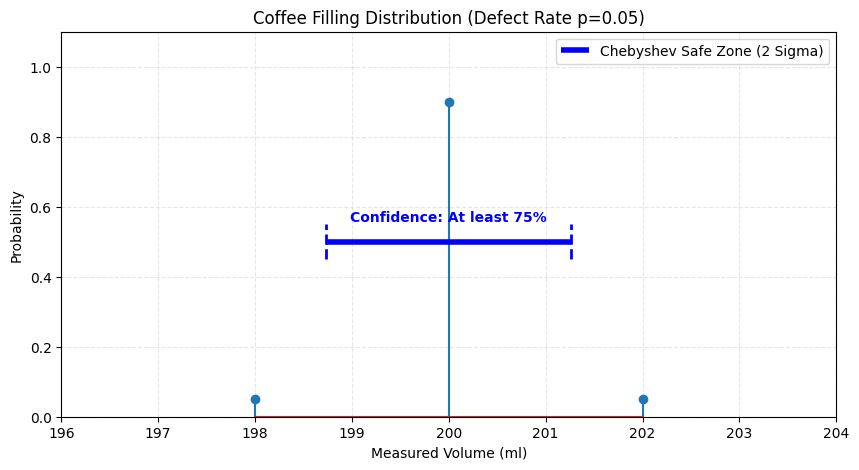

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_coffee_quality_english(mean_vol, error_prob):
    # 1. Define Data
    # The machine produces 3 outcomes: Underfill (-2), Exact, Overfill (+2)
    x_values = np.array([mean_vol - 2, mean_vol, mean_vol + 2])
    probs = np.array([error_prob, 1 - 2 * error_prob, error_prob])
    
    # 2. Calculate Statistics
    # Variance formula for this symmetric distribution (+/- 2 deviation)
    variance = 8 * error_prob 
    sigma = np.sqrt(variance)
    
    # Define Chebyshev k factor (k=2 means 2 standard deviations)
    k = 2 
    interval_radius = k * sigma
    
    # 3. Print Report to Console
    print("--- COFFEE QUALITY CONTROL REPORT ---")
    print(f"Target Volume: {mean_vol} ml")
    print(f"Defect Probability: {error_prob} ({(error_prob*100):.0f}%)")
    print(f"Standard Deviation (Sigma): {sigma:.4f} ml")
    print(f"Safe Zone (2 Sigma): [{mean_vol - interval_radius:.2f}, {mean_vol + interval_radius:.2f}] ml")
    
    # 4. Plotting (Simplified for compatibility)
    plt.figure(figsize=(10, 5))
    
    # Standard stem plot (visualizes the discrete probabilities)
    plt.stem(x_values, probs)
    
    # Labels and Titles
    plt.xlim([mean_vol - 4, mean_vol + 4]) # Set x-axis range
    plt.ylim([0, 1.1])                     # Set y-axis range
    plt.xlabel('Measured Volume (ml)')
    plt.ylabel('Probability')
    plt.title(f'Coffee Filling Distribution (Defect Rate p={error_prob})')

    # 5. Draw the Chebyshev Safe Zone
    left_bound = mean_vol - interval_radius
    right_bound = mean_vol + interval_radius
    
    # Horizontal blue line representing the "Safe Zone"
    plt.hlines(0.5, left_bound, right_bound, colors='blue', linewidth=4, 
               label='Chebyshev Safe Zone (2 Sigma)')
    
    # Vertical markers to show the boundaries
    plt.vlines(left_bound, 0.45, 0.55, colors='blue', linewidth=2, linestyles='dashed')
    plt.vlines(right_bound, 0.45, 0.55, colors='blue', linewidth=2, linestyles='dashed')

    # Add text annotation
    plt.text(mean_vol, 0.55, "Confidence: At least 75%", 
             ha='center', va='bottom', color='blue', fontweight='bold')
    
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Display the plot
    plt.show()

# --- EXECUTE THE FUNCTION ---
# Scenario: Target 200ml, 5% chance of error
plot_coffee_quality_english(mean_vol=200, error_prob=0.05)

# 7.  Joint Density Functions
## 7.1 Definition: The Formula
The ***Joint Probability Density Function*** (Joint PDF), denoted as $p(x, y)$ for two variables $X$ and $Y$, is defined by three fundamental properties: <sup>[1]</sup>
- Non-negativity: For all values of $x, y$: $$p(x, y) \ge 0.\tag{7.1.1}$$ 
- Total Integral equals 1: The volume under the surface over the entire real space $\mathbb{R}^2$ must be 1:$$\int_{\mathbb{R}^2} p(x, y) \, dx \, dy = 1.\tag{7.1.2}$$
- Probability over a Region: The probability that the pair $(X, Y)$ falls into a specific region $\mathcal{D}$ is the integral of the density function over that region:$$P((X, Y) \in \mathcal{D}) = \int_{\mathcal{D}} p(x, y) \, dx \, dy.\tag{7.1.3}$$

For more than two variables, this generalizes to the multivariate density $p(\mathbf{x}) = p(x_1, \dots, x_n)$.
## 7.2 Concrete Example
**Scenario:** Let $X$ and $Y$ be two correlated random variables representing signals from two sensors. Their joint density function is defined on the unit square $[0, 1] \times [0, 1]$ as:$$p(x, y) = 4xy \quad \text{for } 0 \le x \le 1, 0 \le y \le 1.$$
**Requirement:** Prove that this is a valid PDF (Integral equals 1). Calculate the probability that both sensors return a value greater than 0.5. i.e., calculate $P(X > 0.5, Y > 0.5)$.

**Solution:**
- Verify validity (Total Integral = 1):
  $$I = \int_{0}^{1} \int_{0}^{1} 4xy \, dx \, dy$$
  Since $4xy$ is a product of independent terms $4x$ and $y$, we can separate the integrals:
  $$I = 4 \left( \int_{0}^{1} x \, dx \right) \left( \int_{0}^{1} y \, dy \right)$$
  $$I = 4 \left[ \frac{x^2}{2} \right]_0^1 \left[ \frac{y^2}{2} \right]_0^1$$
  $$I = 4 \cdot \frac{1}{2} \cdot \frac{1}{2} = 1$$
  $\Rightarrow$ Valid.
- Calculate Probability $P(X > 0.5, Y > 0.5)$:The region $\mathcal{D}$ is the sub-square where $x \in [0.5, 1]$ and $y \in [0.5, 1]$.
  $$P = \int_{0.5}^{1} \int_{0.5}^{1} 4xy \, dx \, dy$$
  $$P = 4 \left( \int_{0.5}^{1} x \, dx \right) \left( \int_{0.5}^{1} y \, dy \right)$$
  $$P = 4 \left[ \frac{x^2}{2} \right]_{0.5}^1 \left[ \frac{y^2}{2} \right]_{0.5}^1$$
  $$P = 4 \left( \frac{1}{2} - \frac{0.25}{2} \right) \left( \frac{1}{2} - \frac{0.25}{2} \right)$$
  $$P = 4 \left( \frac{0.75}{2} \right) \left( \frac{0.75}{2} \right) = 4 \cdot \frac{0.5625}{4} = 0.5625$$
  Result: The probability is 56.25%.
## 7.3 Python Implementation


--- CALCULATION RESULTS ---
Density Function: p(x, y) = 4xy
Total Integral (Check): 1.0000 (Theory = 1.0)
Probability P(X>0.5, Y>0.5): 0.5625 (Theory = 0.5625)


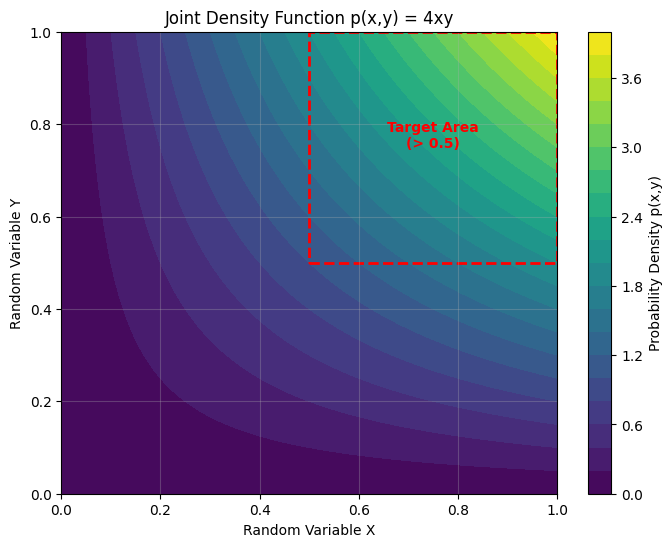

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def analyze_joint_density_example():
    """
    Illustrate joint density function p(x, y) = 4xy on [0, 1]^2
    Based on the definition from the provided image [1].
    """
    
    # 1. Define Density Function
    # p(x, y) = 4xy inside [0,1], else 0
    def p(y, x): 
        if 0 <= x <= 1 and 0 <= y <= 1:
            return 4 * x * y
        return 0.0

    # 2. Numerical Calculation (Integration)
    
    # a) Check Validity (Total integral must be 1)
    # integrate.dblquad(func, x_min, x_max, y_min_func, y_max_func)
    total_area, error = integrate.dblquad(p, 0, 1, lambda x: 0, lambda x: 1)
    
    # b) Calculate Probability P(X > 0.5, Y > 0.5)
    # x bounds: 0.5 to 1, y bounds: 0.5 to 1
    prob_target, _ = integrate.dblquad(p, 0.5, 1, lambda x: 0.5, lambda x: 1)

    print("--- CALCULATION RESULTS ---")
    print(f"Density Function: p(x, y) = 4xy")
    print(f"Total Integral (Check): {total_area:.4f} (Theory = 1.0)")
    print(f"Probability P(X>0.5, Y>0.5): {prob_target:.4f} (Theory = 0.5625)")

    # 3. Visualization (Heatmap)
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(x, y)
    Z = 4 * X * Y  # Density values
    
    plt.figure(figsize=(8, 6))
    
    # Draw Contour plot (Heatmap)
    # Brighter colors (Yellow) indicate higher density
    contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Probability Density p(x,y)')
    
    # Draw the rectangle representing the target area (X>0.5, Y>0.5)
    rect = plt.Rectangle((0.5, 0.5), 0.5, 0.5, linewidth=2, 
                         edgecolor='red', facecolor='none', linestyle='--')
    plt.gca().add_patch(rect)
    plt.text(0.75, 0.75, 'Target Area\n(> 0.5)', color='red', 
             ha='center', fontweight='bold')

    plt.title('Joint Density Function p(x,y) = 4xy')
    plt.xlabel('Random Variable X')
    plt.ylabel('Random Variable Y')
    plt.grid(True, alpha=0.3)
    plt.show()

# --- EXECUTE ---
analyze_joint_density_example()

# 8.  Marginal Distributions
## 8.1 Definition: The Formula
In practice, we often possess the Joint Probability Density Function (Joint PDF) of multiple variables (e.g., $X$ and $Y$), but sometimes we are interested only in the behavior of a specific variable (e.g., only $X$) regardless of the value of the other. The probability distribution of this single variable is called the **Marginal Distribution**. <sup>[1]</sup>

The rule to find the marginal distribution from the joint distribution is to "integrate out" the variables we are not interested in:
- Marginal Density of $X$ ($p_X(x)$): Calculated by integrating the joint density $p(x, y)$ with respect to variable $Y$ over the entire domain of $Y$ (typically $-\infty$ to $+\infty$).$$p_X(x) = \int_{-\infty}^{\infty} p(x, y) \, dy.\tag{22.6.38}$$
- Marginal Density of $Y$ ($p_Y(y)$): Similarly, we integrate with respect to variable $X$.$$p_Y(y) = \int_{-\infty}^{\infty} p(x, y) \, dx.\tag{8.1.2}$$
  
Intuitive Meaning: This integration is akin to "summing up" all possible outcomes of $Y$ to evaluate the total probability density at each point $X$. <sup>[3]</sup>
## 8.2 Step-by-step Computation
We will prove the formula $p_X(x) = \int_{-\infty}^{\infty} p(x, y) \, dy$ starting from the definition of the Cumulative Distribution Function $(22.6.12)$ .
### Step 1: Define the Marginal CDF
The marginal cumulative distribution function of $X$, denoted $F_X(x)$, is the probability that the random variable $X$ takes a value less than or equal to $x$, regardless of the value $Y$ takes.
$$F_X(x) = P(X \le x) = P(X \le x, -\infty < Y < \infty).\tag{8.2.1}$$
### Step 2: Express via Joint PDF by formula $(7.1.3)$
The probability of the event $(X \le x, Y \in (-\infty, \infty))$ is calculated by the double integral of the joint density function over the corresponding region:
$$F_X(x) = \int_{-\infty}^{x} \left( \int_{-\infty}^{\infty} p(u, y) \, dy \right) \, du.\tag{8.2.2}$$
*(We use the dummy variable $u$ in the outer integral to avoid confusion with the limit $x$).*
### Step 3: Relationship between PDF and CDF
By the fundamental definition of calculus in probability, the probability density function (PDF) is the derivative of the cumulative distribution function (CDF):
$$p_X(x) = \frac{d}{dx} F_X(x).\tag{8.2.3}$$
#### Step 4: Apply the Fundamental Theorem of CalculusSubstitute the expression from Step 2 into Step 3:
$$p_X(x) = \frac{d}{dx} \left( \int_{-\infty}^{x} \underbrace{\left[ \int_{-\infty}^{\infty} p(u, y) \, dy \right]}_{g(u)} \, du \right).\tag{8.2.4}$$
Applying the theorem: $\frac{d}{dx} \int_{-\infty}^x g(u) du = g(x)$, we obtain:
$$p_X(x) = \int_{-\infty}^{\infty} p(x, y) \, dy.\tag{Q.E.D.}$$
## 8.3 Concrete Example
**Scenario:** Let $X, Y$ be two random variables with a joint density function defined on the unit square $[0, 1] \times [0, 1]$ as follows:$$p(x, y) = \frac{2}{3}(x + 2y) \quad \text{for } 0 \le x, y \le 1$$(And 0 elsewhere).

**Requirement:** Find the marginal density function of $X$ (i.e., $p_X(x)$) and verify if it is a valid density function.

**Solution:** 
- Find the Marginal Density $p_X(x)$: To find the marginal with respect to $X$, we integrate $p(x, y)$ with respect to $Y$ from 0 to 1 (since the domain of $Y$ is $[0, 1]$). Treat $x$ as a constant.
  $$p_X(x) = \int_{0}^{1} \frac{2}{3}(x + 2y) \, dy$$
  Factor out the constant $\frac{2}{3}$:
  $$p_X(x) = \frac{2}{3} \left[ \int_{0}^{1} x \, dy + \int_{0}^{1} 2y \, dy \right]$$
  $$p_X(x) = \frac{2}{3} \left[ xy \Big|_{y=0}^{1} + y^2 \Big|_{y=0}^{1} \right]$$
  $$p_X(x) = \frac{2}{3} \left[ (x \cdot 1 - 0) + (1^2 - 0) \right]$$
  $$p_X(x) = \frac{2}{3} (x + 1)$$
  Thus, the marginal density of $X$ is:$$p_X(x) = \frac{2}{3}(x + 1) \quad \text{for } 0 \le x \le 1$$
- Verify the Validity of $p_X(x)$:A valid PDF must integrate to 1 over its entire domain.
  $$\int_{0}^{1} p_X(x) \, dx = \int_{0}^{1} \frac{2}{3}(x + 1) \, dx$$
  $$= \frac{2}{3} \left[ \frac{x^2}{2} + x \right]_{0}^{1}$$
  $$= \frac{2}{3} \left( \frac{1}{2} + 1 \right) = \frac{2}{3} \cdot \frac{3}{2} = 1$$
  Conclusion: The result is correct and valid.
## 8.4 Python Implementation


--- CALCULATION CHECK ---
x          | Marginal (Code)      | Marginal (Theory)   
0.0        | 0.6667               | 0.6667              
0.5        | 1.0000               | 1.0000              
1.0        | 1.3333               | 1.3333              


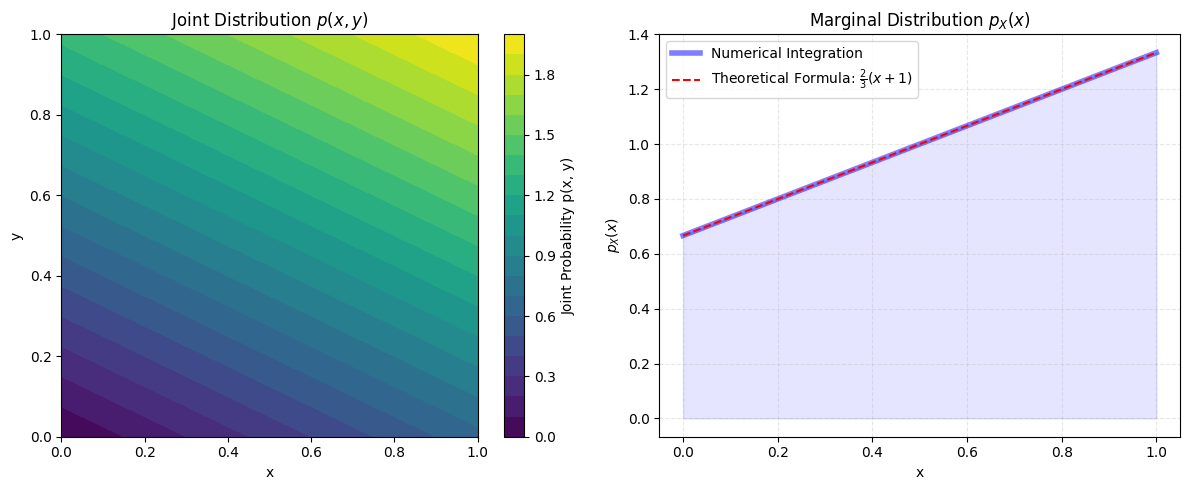

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def analyze_marginal_distribution():
    """
    Illustrates calculating Marginal Distribution from Joint PDF.
    Problem: p(x, y) = 2/3 * (x + 2y) on [0, 1]^2
    """
    
    # 1. Define Joint PDF
    def joint_p(y, x): # Note: order y, x for dblquad or specific integration wrappers
        if 0 <= x <= 1 and 0 <= y <= 1:
            return (2/3) * (x + 2*y)
        return 0.0

    # 2. Define Theoretical Marginal Function (Hand-calculated)
    def theoretical_marginal_x(x):
        if 0 <= x <= 1:
            return (2/3) * (x + 1)
        return 0.0

    # 3. Numerical Calculation for Verification
    # Select a few points for x to test
    test_points = [0.0, 0.5, 1.0]
    print("--- CALCULATION CHECK ---")
    print(f"{'x':<10} | {'Marginal (Code)':<20} | {'Marginal (Theory)':<20}")
    
    for val_x in test_points:
        # Integrate p(x, y) w.r.t dy from 0 to 1 to get p_X(x)
        # args=(val_x,) passes the fixed x value to the function
        marginal_numerical, _ = integrate.quad(lambda y: joint_p(y, val_x), 0, 1)
        marginal_theory = theoretical_marginal_x(val_x)
        
        print(f"{val_x:<10} | {marginal_numerical:<20.4f} | {marginal_theory:<20.4f}")

    # 4. Visualization
    plt.figure(figsize=(12, 5))

    # --- Plot 1: Joint PDF (Heatmap) ---
    plt.subplot(1, 2, 1)
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(x, y)
    Z = (2/3) * (X + 2*Y)
    
    cp = plt.contourf(X, Y, Z, cmap='viridis', levels=20)
    plt.colorbar(cp, label='Joint Probability p(x, y)')
    plt.title('Joint Distribution $p(x, y)$')
    plt.xlabel('x')
    plt.ylabel('y')

    # --- Plot 2: Marginal PDF of X ---
    plt.subplot(1, 2, 2)
    x_vals = np.linspace(0, 1, 100)
    
    # Calculate numerical marginals for the entire x array
    y_marginal_num = [integrate.quad(lambda y: joint_p(y, val), 0, 1)[0] for val in x_vals]
    
    plt.plot(x_vals, y_marginal_num, label='Numerical Integration', color='blue', linewidth=4, alpha=0.5)
    plt.plot(x_vals, [theoretical_marginal_x(v) for v in x_vals], 
             label='Theoretical Formula: $\\frac{2}{3}(x+1)$', 
             color='red', linestyle='--')
    
    plt.fill_between(x_vals, y_marginal_num, alpha=0.1, color='blue')
    plt.title('Marginal Distribution $p_X(x)$')
    plt.xlabel('x')
    plt.ylabel('$p_X(x)$')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

# --- EXECUTE PROGRAM ---
analyze_marginal_distribution()

# 9.  Covariance
## 9.1 Definition: The Formula
When examining individual random variables, we use Variance to measure dispersion. However, when working with pairs of random variables $(X, Y)$, we need a metric to assess how they vary together. This metric is called Covariance. <sup>[4]</sup>

Denoted as $Cov(X, Y)$ or $\sigma_{XY}$, covariance is defined as the expectation of the product of the deviations of two variables from their respective means: <sup>[4]</sup>
$$\boxed{\sigma_{XY} = Cov(X, Y) = E[(X-E[X])(Y-E[Y])].} \tag{9.1.1} $$
Or for Discrete Random Variable: <sup>[1]</sup>$$\sigma_{XY} = Cov(X, Y) = \sum_{i,j} (x_i-\mu_X)(y_j-\mu_Y)p_{i,j} = E[XY]-E[X][Y]. \tag{22.6.39} $$
Or for Continuous Random Variable: <sup>[1]</sup>$$\sigma_{XY} = Cov(X, Y) = \int_{\R^2} (x-\mu_X)(y-\mu_Y)p(x,y) \, dx\, dy.\tag{22.6.42}$$

Or for Discrete Random Variable:
## 9.2 Step-by-step Computation
### 9.2.1 Prove that: 
$$Cov(X, Y) = E[XY]-E[X][Y].\tag{9.2.1} $$
#### Step 1: Start with the original definition
$$Cov(X, Y) = E[(X-E[X])(Y-E[Y])]= E[(X - \mu_X)(Y - \mu_Y)]. \tag{9.2.1.1}$$
#### Step 2: Expand the internal expression Multiply the polynomial $(X - \mu_X)(Y - \mu_Y)$:
$$(X - \mu_X)(Y - \mu_Y) = XY - X\mu_Y - Y\mu_X + \mu_X\mu_Y.\tag{9.2.1.2}$$
#### Step 3: Apply the Formula $(4.2.2)$:
$$Cov(X, Y) = E[XY - X\mu_Y - Y\mu_X + \mu_X\mu_Y].\tag{9.2.1.3}$$
$$Cov(X, Y) = E[XY] - E[X\mu_Y] - E[Y\mu_X] + E[\mu_X\mu_Y].\tag{9.2.1.4}$$
#### Step 4: Factor out constantsNote that $\mu_X$ and $\mu_Y$ are constant values, so $E[c] = c$ and $E[cX] = cE[X]$ by formula $(4.2.1)$.
$$Cov(X, Y) = E[XY] - \mu_Y \underbrace{E[X]}_{\mu_X} - \mu_X \underbrace{E[Y]}_{\mu_Y} + \mu_X\mu_Y.\tag{9.2.1.5}$$
#### Step 5: Simplify
$$Cov(X, Y) = E[XY] - \mu_Y\mu_X - \mu_X\mu_Y + \mu_X\mu_Y.\tag{9.2.1.6}$$
$$Cov(X, Y) = E[XY] - \mu_X\mu_Y.\tag{9.2.1.7}$$
Or written in full form: $$Cov(X, Y) = E[XY] - E[X]E[Y].\tag{Q.E.D.}$$
### 9.2.2 Discrete Random Variable
Suppose that we have two random variables $X$ and $Y$, to begin with, let’s suppose they are discrete, taking on values $(x_i,y_j)$ with probability $p_{i,j}= P(X=x_i, Y=y_j).$ <sup>[1]</sup>, prove that: 
$$Cov(X, Y) = \sum_{i,j} (x_i-\mu_X)(y_j-\mu_Y)p_{i,j}.\tag{9.2.2}$$
#### Step 1: Expand the terms inside the summation Multiply the two terms in the parentheses $(x_i - \mu_X)(y_j - \mu_Y)$:
$$(x_i - \mu_X)(y_j - \mu_Y) = x_i y_j - x_i \mu_Y - y_j \mu_X + \mu_X \mu_Y.\tag{9.2.2.1}$$
Now, substitute this back into the summation: $$\sum_{i,j} (x_i-\mu_X)(y_j-\mu_Y)p_{i,j} = \sum_{i} \sum_{j} (x_i y_j - x_i \mu_Y - y_j \mu_X + \mu_X \mu_Y) p_{i,j}.\tag{9.2.2.2}$$
#### Step 2: Distribute the summation
$$\sum_{i} \sum_{j} (x_i y_j - x_i \mu_Y - y_j \mu_X + \mu_X \mu_Y) p_{i,j} = \underbrace{\sum_{i,j} x_i y_j p_{i,j}}_{\text{Term 1}} - \underbrace{\sum_{i,j} x_i \mu_Y p_{i,j}}_{\text{Term 2}} - \underbrace{\sum_{i,j} y_j \mu_X p_{i,j}}_{\text{Term 3}} + \underbrace{\sum_{i,j} \mu_X \mu_Y p_{i,j}}_{\text{Term 4}}.\tag{9.2.2.3}$$
#### Step 3: Analyze and simplify each term
- Term 1: By definition from formula $(22.6.14)$: $$\sum_{i,j} x_i y_j p_{i,j} = E[XY].\tag{9.2.2.4}$$
- Term 2: $\mu_Y$ is a constant, so we can move it outside the summation. We can also group the sum over $j$ first:
  $$\sum_{i,j} x_i \mu_Y p_{i,j} = \mu_Y \sum_{i} x_i \left( \sum_{j} p_{i,j} \right).\tag{9.2.2.5}$$
  Recall that summing the joint probability over all $y$ gives the Marginal Probability of $X$ ($p_i$): $\sum_{j} p_{i,j} = P(X=x_i) = p_i$.
$$\mu_Y \sum_{i} x_i \left( \sum_{j} p_{i,j} \right)= \mu_Y \sum_{i} x_i p_i = \mu_Y E[X].\tag{9.2.2.6}$$
- Term 3: Similarly, $\mu_X$ is a constant. We move it out and sum over $i$ first to find the marginal of $Y$:
$$\sum_{i,j} y_j \mu_X p_{i,j} = \mu_X \sum_{j} y_j \left( \sum_{i} p_{i,j} \right).\tag{9.2.2.7}$$
  Since $\sum_{i} p_{i,j} = P(Y=y_j) = p_j$:$$\mu_X \sum_{j} y_j \left( \sum_{i} p_{i,j} \right)= \mu_X \sum_{j} y_j p_j = \mu_X E[Y].\tag{9.2.2.8}$$
- Term 4: Both $\mu_X$ and $\mu_Y$ are constants.
  $$\sum_{i,j} \mu_X \mu_Y p_{i,j} = \mu_X \mu_Y \left( \sum_{i,j} p_{i,j} \right )= \mu_X \mu_Y.\tag{9.2.2.9}$$
  The sum of all joint probabilities over the entire sample space is always equal to 1.
#### Step 4: Combine the simplified terms
Substitute the results from Step 3 back into the equation from Step 2:
$$\sum_{i,j} (x_i-\mu_X)(y_j-\mu_Y)p_{i,j} = E[XY] - \mu_Y E[X] - \mu_X E[Y] + \mu_X \mu_Y.\tag{9.2.2.10}$$
#### Step 5: Final Substitution
Recall that $\mu_X = E[X]$ and $\mu_Y = E[Y]$. Substitute these notations to make them consistent:
$$E[XY] - \mu_Y E[X] - \mu_X E[Y] + \mu_X \mu_Y = E[XY] - E[Y]E[X] - E[X]E[Y] + E[X]E[Y].\tag{9.2.2.11}$$
We have $-2 E[X]E[Y] + 1 E[X]E[Y]$, which simplifies to $-1 E[X]E[Y]$.
$$\sum_{i,j} (x_i-\mu_X)(y_j-\mu_Y)p_{i,j} = E[XY] - \mu_Y E[X] - \mu_X E[Y] + \mu_X \mu_Y = E[XY] - E[X]E[Y].\tag{9.2.2.12}$$
From the Formula $(9.2.1)$, we have $$\sum_{i,j} (x_i-\mu_X)(y_j-\mu_Y)p_{i,j} = E[XY] - E[X]E[Y] = \text{Cov}(X, Y).\tag{Q.E.D.}$$

### 9.2.3 Continuous Random Variable
Prove that: <sup>[1]</sup> 
$$\sigma_{XY} = Cov(X, Y) = \int_{\R^2} (x-\mu_X)(y-\mu_Y)p(x,y) \, dx\, dy.\tag{22.6.42}$$
#### Step 1: Expand the terms inside the integral
Multiply the factors $(x - \mu_X)$ and $(y - \mu_Y)$
$$\int_{\R^2} (x-\mu_X)(y-\mu_Y)p(x,y) \, dx\, dy = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \left( xy - x\mu_Y - y\mu_X + \mu_X\mu_Y \right) p(x,y) \, dx \, dy.\tag{9.2.3.1}$$
#### Step 2: Split the Integral 
Integrals are linear, so we can break this big integral into four smaller integrals. We also pull the constants ($\mu_X$ and $\mu_Y$) outside the integrals where possible.
$$\begin{aligned}
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \left( xy - x\mu_Y - y\mu_X + \mu_X\mu_Y \right) p(x,y) \, dx \, dy = & \underbrace{\int \int xy \, p(x,y) \, dx \, dy}_{\text{Term 1}} \\
& - \mu_Y \underbrace{\int \int x \, p(x,y) \, dx \, dy}_{\text{Term 2}} \\
& - \mu_X \underbrace{\int \int y \, p(x,y) \, dx \, dy}_{\text{Term 3}} \\
& + \mu_X \mu_Y \underbrace{\int \int p(x,y) \, dx \, dy}_{\text{Term 4}}
\end{aligned}.\tag{9.2.3.2}$$
#### Step 3: Evaluate each term by the formula $(22.6.23)$
- Term 1: By definition, $\int \int xy \, p(x,y) \, dx \, dy = \mathbf{E[XY]}$.
- Term 2: The inner part $\int \int x \, p(x,y) \, dx \, dy$ is the definition of $\mathbf{E[X]}$ (or $\mu_X$). So this term becomes $\mu_Y \cdot \mu_X$.
- Term 3: Similarly, $\int \int y \, p(x,y) \, dx \, dy$ is the definition of $\mathbf{E[Y]}$ (or $\mu_Y$). So this term becomes $\mu_X \cdot \mu_Y$.
- Term 4: The integral $\int \int p(x,y) \, dx \, dy$ is the sum of all probabilities over the entire space, which must equal 1. So this term becomes $\mu_X \mu_Y \cdot 1$.
#### Step 4: Substitute and Simplify
Now, put the simplified terms back together:
$$ \int_{\R^2} (x-\mu_X)(y-\mu_Y)p(x,y) \, dx\, dy = E[XY] - (\mu_Y \cdot \mu_X) - (\mu_X \cdot \mu_Y) + (\mu_X \mu_Y).\tag{9.2.3.3}$$
Since $\mu_X = E[X]$ and $\mu_Y = E[Y]$, we can rewrite this as:$$\int_{\R^2} (x-\mu_X)(y-\mu_Y)p(x,y) \, dx\, dy = E[XY] - E[Y]E[X] - E[X]E[Y] + E[X]E[Y].\tag{9.2.3.4}$$
Notice that $-E[X]E[Y]$ and $+E[X]E[Y]$ cancel out one of the subtractions:$$\int_{\R^2} (x-\mu_X)(y-\mu_Y)p(x,y) \, dx\, dy = E[XY] - E[X]E[Y].\tag{9.2.3.5}$$
From the Formula $(9.1.2)$, we have $$\int_{\R^2} (x-\mu_X)(y-\mu_Y)p(x,y) \, dx\, dy = E[XY] - E[X]E[Y] = \text{Cov}(X, Y) =\sigma_{XY}.\tag{Q.E.D.}$$
### 9.2.4 Consider $X$ as any random variable, and $Y=aX+b$ as any linear deterministic function of $X$
**Prove:** $$\text{Cov}(X, Y) = a\text{Var}(X).\tag{9.2.4}$$ 
We use the basic properties of Covariance and Expectation ($E$):
- From the Formula $(9.1.1)$: $\text{Cov}(X, Y) = E[(X - E[X])(Y - E[Y])].$
- From the Formula $(4.2.1)$: $E[aX + b] = aE[X] + b$.
#### Step 1: Substitute $Y = aX + b$ into the formula for $E[Y]$:
$$E[Y] = E[aX + b] = aE[X] + b.\tag{9.2.4.1}$$
#### Step 2: Consider the difference $Y - E[Y]$:
$$Y - E[Y] = (aX + b) - (aE[X] + b) = aX - aE[X] = a(X - E[X]).\tag{9.2.4.2}$$
#### Step 3: Substitute this into the definition of Covariance:
$$  \begin{aligned}
  \text{Cov}(X, Y) &= E\left[ (X - E[X]) \cdot (Y - E[Y]) \right] \\
  &= E\left[ (X - E[X]) \cdot a(X - E[X]) \right] \\
  &= E\left[ a(X - E[X])^2 \right]
  \end{aligned}.\tag{9.2.4.3}$$
#### Step 4: Factor the constant $a$ out of the expectation:
$$\text{Cov}(X, Y)= a \cdot E\left[ (X - E[X])^2 \right].\tag{9.2.4.4}$$
#### Step 5: By definition form formula $(22.6.16)$: $\text{Var}(X) = E[(X - \mu_X)^2]$.
$$\text{Cov}(X, Y)= a\text{Var}(X).\tag{Q.E.D.}$$
### 9.3 Concrete Example
Let's assume variable $X$ is the Daily Temperature (normalized: 0 is mild, positive is hot, negative is cold).

**Case 1:** Positive Covariance (+1.2)
- $Y$ = Iced Tea Sales.
- Logic: The hotter it gets ($X$ increases), the more people drink ($Y$ increases).
  
**Case 2:** Negative Covariance (-0.9)
- $Y$ = Sweater Sales.
- Logic: The hotter it gets ($X$ increases), the fewer people buy winter clothes ($Y$ decreases).
  
**Case 3:** Zero Covariance (0.0)
- $Y$ = Phone Bill Cost.
- Logic: Whether it is hot or cold has absolutely no relationship to how much the carrier charges you.
## 9.4 Python Implementation


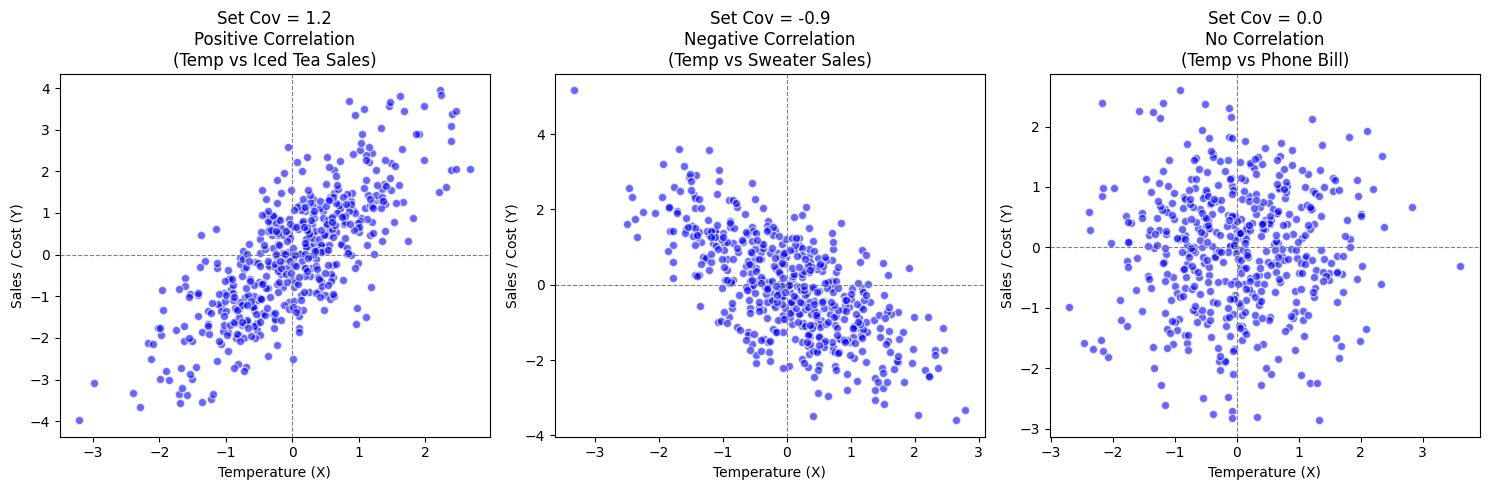

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Configuration
# Desired covariance coefficients (corresponding to the scenarios above)
covs = [1.2, -0.9, 0.0] 
titles = [
    'Positive Correlation\n(Temp vs Iced Tea Sales)', 
    'Negative Correlation\n(Temp vs Sweater Sales)', 
    'No Correlation\n(Temp vs Phone Bill)'
]

# Set random seed for reproducibility
np.random.seed(10)

# Create figure frame
plt.figure(figsize=(15, 5))

# 2. Loop to generate data and plot
for i in range(3):
    # Generate variable X: Temperature (Standard Normal Random Variable)
    # np.random.randn is equivalent to torch.randn
    X = np.random.randn(500)
    
    # Generate variable Y based on linear formula: Y = aX + Noise
    # Noise is also generated using randn
    Y = covs[i] * X + np.random.randn(500)

    # 3. Draw Scatter Plot
    plt.subplot(1, 3, i+1)
    plt.scatter(X, Y, alpha=0.6, c='blue', edgecolors='white')
    
    # Decoration
    plt.xlabel('Temperature (X)')
    plt.ylabel('Sales / Cost (Y)')
    plt.title(f'Set Cov = {covs[i]}\n{titles[i]}')
    
    # Draw zero-axis lines for better visibility
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Show plot
plt.tight_layout()
plt.show()

# 10.  Correlation
## 10.1 Definition: The Formula
The **correlation** coefficient (often referred to as the Pearson correlation coefficient), denoted as $\rho$ (rho), is a normalized measure used to assess the linear relationship between two random variables. Unlike Covariance, whose value depends on the units of measurement of the variables (e.g., meters vs. centimeters), the correlation coefficient is a unitless quantity that always lies within the range $[-1, 1]$. <sup>[5]</sup>

The defining formula for the correlation coefficient between two random variables $X$ and $Y$ is the quotient of their covariance and the product of their standard deviations: <sup>[1]</sup>
$$\boxed{\rho_{XY} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}.} \tag{22.6.45} $$
Where: <sup>[5]</sup>
- $\text{Cov}(X, Y)$ is the covariance between $X$ and $Y$.
- $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$, respectively (with $\sigma > 0$).
- If $\rho = 1$: Perfect positive correlation.
- If $\rho = -1$: Perfect negative correlation.
- If $\rho = 0$: No linear correlation (or uncorrelated).
## 10.2 Step-by-step Computation
### 10.2.1: Consider $X$ as any random variable, and $Y=aX+b$ as any linear deterministic function of $X$

**Prove:** $$\rho_{XY} = sign(a)\tag{22.6.49} $$ 
#### Step 1: Apply the formula $(5.2.2)$, we have:
$$\text{Var}(aX + b) = a^2 \text{Var}(X) = a^2 \cdot \sigma_X^2.\tag{10.2.1.1}$$
#### Step 2: Calculate the standard deviation of $Y$ ($\sigma_Y$):
Standard deviation is the square root of variance: $$\sigma_Y = \sqrt{\text{Var}(Y)}= \sqrt{\text{Var}(aX + b)} = \sqrt{a^2 \sigma_X^2} = |a|\sigma_X.\tag{10.2.1.2}$$
*(Note: The square root of $a^2$ is the absolute value $|a|$).*
#### Step 3: Substitute into the formula for $\rho(X, Y)$:
From formula $(9.2.4)$ and $(10.2.2)$, we have $\text{Cov}(X, Y) = a\text{Var}(X)$ and the denominator is $\sigma_X \sigma_Y = \sigma_X \cdot |a|\sigma_X = |a|\sigma_X^2$.

We have: $$ \rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} = \frac{a\text{Var}(X)}{\sigma_X \sigma_Y} =\frac{a\sigma_X^2}{|a|\sigma_X^2}.\tag{10.2.1.3}$$
#### Step 4: Cancel out $\sigma_X^2$ (assuming $\sigma_X^2 > 0$):
$$ \rho(X, Y) = \frac{a}{|a|}.\tag{10.2.1.4}$$
#### Step 5: Interpret the result:The ratio $\frac{a}{|a|}$ is the sign function:
- If $a > 0$: $\frac{a}{a} = 1$.
- If $a < 0$: $\frac{a}{-a} = -1$.
  
Therefore:$$\rho(X, Y) = \text{sign}(a).\tag{Q.E.D.}$$
### 10.2.2: For any random variable $X$ <sup>[1]</sup>
$$\rho(X, X) = 1.\tag{10.2.2}$$
Meaning: A variable is always perfectly correlated with itself.
#### Step 1: Consider the numerator (Covariance of $X$ with itself):
$$\text{Cov}(X, X) = \text{Var}(X) = \sigma_X^2.\tag{10.2.2.1}$$
#### Step 2: Consider the denominator (Product of standard deviations):
$$\sigma_X \cdot \sigma_X = \sigma_X^2.\tag{10.2.2.2}$$
#### Step 3: Substitute into the formula:
$$\rho(X, X) = \frac{\text{Cov}(X, X)}{\sigma_X \sigma_X} = \frac{\sigma_X^2}{\sigma_X^2} = 1.\tag{Q.E.D.}$$

### 10.2.3: Invariance to Linear Scaling
For any random variables $X, Y$ and numbers $a$ and $b$: <sup>[1]</sup> 
$$\rho(aX + b, Y) = \rho(X, aY + b) = \rho(X, Y).\tag{10.2.3}$$
(Note: This formula holds strictly when the scaling factor $a > 0$. If $a < 0$, the sign of the correlation flips).

**Proof for the term**: $\rho(aX + b, Y) = \rho(X, Y)$ assuming $a > 0$:

Let $Z = aX + b$. We need to calculate $\rho(Z, Y)$.

#### Step 1: Calculate Covariance (Numerator): 
From Formula $(9.2.4)$: $\text{Cov}(X, Y)= a\text{Var}(X)$, we have:
$$\text{Cov}(aX + b, Y) = a \cdot \text{Cov}(X, Y).\tag{10.2.3.1}$$
*(The constant $b$ does not affect Covariance).*

#### Step 2: Calculate Standard Deviation (Denominator): We have $\text{Var}(aX + b) = a^2 \text{Var}(X)$.

Therefore, the standard deviation of $Z$ is: $$\sigma_Z = \sqrt{a^2 \text{Var}(X)} = |a| \cdot \sigma_X.\tag{10.2.3.2}$$
#### Step 3: Substitute into the formula:
$$\rho(aX + b, Y) = \frac{\text{Cov}(aX + b, Y)}{\sigma_Z \cdot \sigma_Y} = \frac{a \cdot \text{Cov}(X, Y)}{|a| \cdot \sigma_X \cdot \sigma_Y}.\tag{10.2.3.3}$$
#### Step 4: Simplify:
Since we assumed $a > 0$, then $\frac{a}{|a|} = 1$.
$$\rho(aX + b, Y) = 1 \cdot \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} = \rho(X, Y).\tag{Q.E.D.}$$

*$\Rightarrow$ The proof is similar for the term $\rho(X, aY+b)$.*

### 10.2.4: If $X$ and $Y$ are independent with non-zero variance, then $\rho(X, Y) = 0$  <sup>[1]</sup>
#### Step 1: By definition, if $X$ and $Y$ are independent, the expectation of their product equals the product of their expectations:
$$E[XY] = E[X] \cdot E[Y].\tag{10.2.4.1}$$
#### Step 2: The formula for Covariance is:
$$\text{Cov}(X, Y) = E[XY] - E[X]E[Y].\tag{10.2.4.2}$$
#### Step 3: Substitute (1) into (2):
$$\text{Cov}(X, Y) = E[X]E[Y] - E[X]E[Y] = 0.\tag{10.2.4.3}$$
#### Step 4: Substitute into the correlation formula:
$$\rho(X, Y) = \frac{0}{\sigma_X \sigma_Y} = 0.\tag{10.2.4.4}$$
*(Assuming non-zero variance so the denominator is valid).* $\Rightarrow$ Q.E.D.

## 10.3 Concrete Example
The relationship between Study Time ($X$) and Exam Score ($Y$) of a class:

**Case 1:** Strong Positive Correlation (Correlation $\approx 1.0$)
- Example: $X$ is study time, $Y$ is the exam score.
- Explanation: The more you study ($X$ increases), the higher the score ($Y$ increases). The data points will form a very clear upward line.
- Formula in code: $Y = 1.0 \times X + \text{little noise}$.
  
**Case 2:** Strong Negative Correlation (Correlation $\approx -0.9$)
- Example: $X$ is time spent gaming during exam week, $Y$ is the exam score.
- Explanation: The more you play ($X$ increases), the lower the score ($Y$ decreases). The data points will form a downward slope.
- Formula in code: $Y = -0.9 \times X + \text{noise}$.
  
**Case 3:** No Correlation (Correlation $\approx 0.0$)
- Example: $X$ is waist size, $Y$ is the exam score.
- Explanation: Whether you are skinny or heavy has nothing to do with how well you do on the test. The data points will be scattered messily, forming a circle or a cloud with no specific direction.
- Formula in code: $Y = 0.0 \times X + \text{pure noise}$.
  
## 10.4 Python Implementation


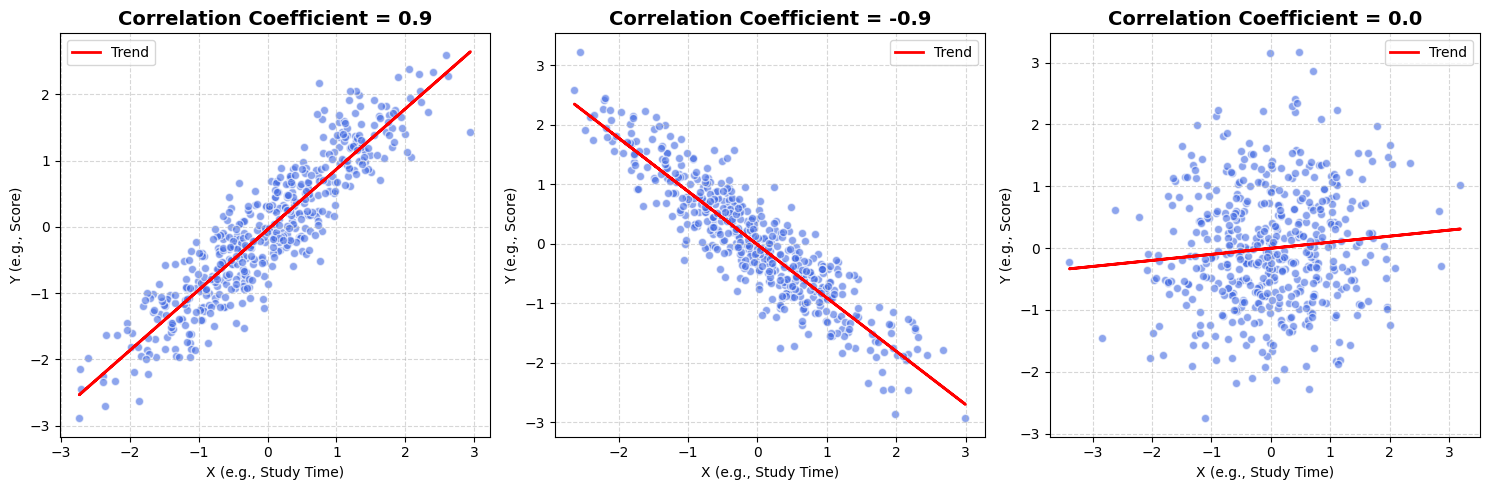

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Configuration for better display
plt.figure(figsize=(15, 5))

# List of correlation coefficients to test
# 0.9: Positive Correlation (Both increase together)
# -0.9: Negative Correlation (One up, one down)
# 0.0: No relation
correlations = [0.9, -0.9, 0.0]

# Generate sample data (500 points)
n_samples = 500

for i, r in enumerate(correlations):
    # 1. Generate random variable X (Normal distribution)
    X = np.random.randn(n_samples)
    
    # 2. Generate random noise independent of X
    noise = np.random.randn(n_samples)
    
    # 3. Generate variable Y based on the formula to ensure correlation r
    # Formula: Y = r*X + sqrt(1 - r^2)*noise
    # Meaning: Y is a combination of X (scaled by r) and Noise (the rest)
    Y = r * X + np.sqrt(1 - r**2) * noise

    # 4. Plot the chart
    plt.subplot(1, 3, i + 1)
    plt.scatter(X, Y, alpha=0.6, color='royalblue', edgecolor='white')
    
    # Chart decoration
    plt.title(f'Correlation Coefficient = {r}', fontsize=14, fontweight='bold')
    plt.xlabel('X (e.g., Study Time)')
    plt.ylabel('Y (e.g., Score)')
    plt.grid(True, linestyle='--', alpha=0.5)

    # Add a trend line (red) to visualize data direction
    m, b = np.polyfit(X, Y, 1) # Find the line of best fit
    plt.plot(X, m*X + b, color='red', linewidth=2, label='Trend')
    plt.legend()

plt.tight_layout()
plt.show()

# 11. Exercises
##  Exercises 1
> Suppose that we have the random variable with density given by $p(x) = \frac{1}{x^2}$ and $p(x) = 0$ otherwise. What is $P(X > 2)$?

We have: $$p(x) = \begin{cases} \frac{1}{x^2}, & \text{with } x \ge 1 \\ 0, & \text{otherwise} \end{cases}$$
### Step-by-step computation
**Step 1: Set up the probability formula**

For a continuous random variable, the probability that $X$ falls within a range is the area under the density curve $p(x)$ for that range. Apply the Formula $(22.6.9)$: $$P(X > 2) = \int_{2}^{+\infty} p(x) \, dx$$

**Step 2: Substitute the function**

Since the range is from $2$ to $+\infty$ (which satisfies the condition $x \ge 1$), we use the function $p(x) = \frac{1}{x^2}$:
$$P(X > 2) = \int_{2}^{+\infty} \frac{1}{x^2} \, dx$$

**Step 3: Find the antiderivative**

Rewrite $\frac{1}{x^2}$ as a power to make it easier to integrate: $x^{-2}$. 

Apply the power rule for integration $\int x^n dx = \frac{x^{n+1}}{n+1}$, we have:
$$\int x^{-2} \, dx = \frac{x^{-2+1}}{-2+1} = \frac{x^{-1}}{-1} = -\frac{1}{x}$$

**Step 4: Evaluate the limits**

Apply the Fundamental Theorem of Calculus for the limits $2$ to $+\infty$:
$$P(X > 2) = \left[ -\frac{1}{x} \right]_{2}^{+\infty}$$
Substitute the upper limit ($+\infty$) and the lower limit ($2$):
$$P(X > 2) = \left[ -\frac{1}{x} \right]_{2}^{+\infty}= \lim_{x \to \infty} \left( -\frac{1}{x} \right) - \left( -\frac{1}{2} \right)$$
   As $x$ approaches infinity, $\frac{1}{x}$ approaches $0$.
Subtracting a negative becomes addition: 
$$P(X > 2) = \lim_{x \to \infty} \left( -\frac{1}{x} \right) - \left( -\frac{1}{2} \right)= 0 + \frac{1}{2} = 0.5$$
Conclusion:The probability $P(X > 2)$ is 0.5 (or 50%).
### Python Implementation

Exact calculated result P(X > 2) = 1/2
------------------------------


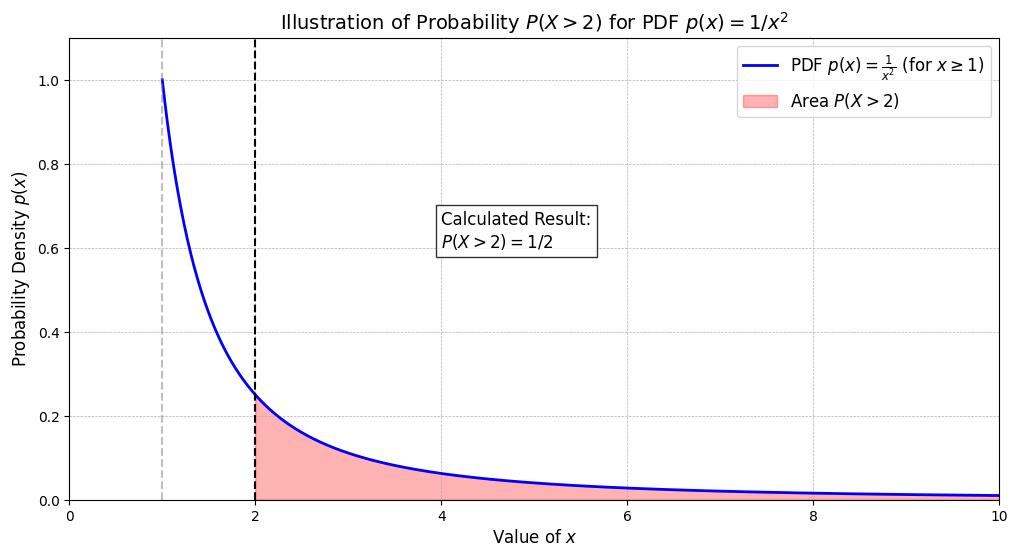

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, integrate, oo

# --- PART 1: EXACT CALCULATION USING SYMPY ---
x_sym = symbols('x')
p_x_sym = 1 / x_sym**2

# Calculate the definite integral from 2 to infinity
probability_exact = integrate(p_x_sym, (x_sym, 2, oo))

print(f"Exact calculated result P(X > 2) = {probability_exact}")
print("-" * 30)

# --- PART 2: VISUALIZATION USING MATPLOTLIB ---

# 1. Prepare data
x_plot = np.linspace(1, 10, 1000)
y_plot = 1 / x_plot**2

x_fill = np.linspace(2, 10, 1000)
y_fill = 1 / x_fill**2

# 2. Setup the plot
plt.figure(figsize=(12, 6))

# --- FIX HERE: Changed \ge to \geq ---
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label=r'PDF $p(x) = \frac{1}{x^2}$ (for $x \geq 1$)')

# Shade the area representing P(X > 2)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.3, label=r'Area $P(X > 2)$')

# Add vertical lines (duplicate argument error fixed previously)
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=2, color='black', linestyle='--', linewidth=1.5)

# 3. Decorate the plot
plt.title(r'Illustration of Probability $P(X > 2)$ for PDF $p(x) = 1/x^2$', fontsize=14)
plt.xlabel(r'Value of $x$', fontsize=12)
plt.ylabel(r'Probability Density $p(x)$', fontsize=12)
plt.xlim(0, 10)
plt.ylim(0, 1.1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Display the calculation result
plt.text(4, 0.6, f'Calculated Result:\n$P(X > 2) = {probability_exact}$', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

## Exercise 2
> The Laplace distribution is a random variable whose density is given by $$p(x) = \frac{1}{2}e^{-|x|}.$$
> What is the mean and the standard deviation of this function? As a hint, $\int_{0}^{\infty} xe^{-x} dx = 1$ and $\int_{0}^{\infty} x^2e^{-x} dx = 2$.
### Step-by-step computation
Let the Laplace distribution is $X$: Because we have The Laplace distribution is a random variable whose density, so $X$ is Continuous Random Variable.

#### 1. Calculate the Mean ($\mu$)

**Step 1:**

By definition from formula $(22.6.23)$, the expected value $E[X]$ is calculated as:
$$E[X] = \int_{-\infty}^{+\infty} x \cdot p(x) \, dx = \int_{-\infty}^{+\infty} x \cdot \frac{1}{2}e^{-|x|} \, dx$$

**Step 2:** Analyze the parity (even/odd nature) of the integrand $f(x) = x \cdot \frac{1}{2}e^{-|x|}$:

- $x$ is an odd function (since $-x$ is the opposite of $x$).
- $e^{-|x|}$ is an even function (since $|-x| = |x|$).
- The product of an odd function and an even function is an odd function.
  
**Step 3:** 

Property: The integral of an odd function over a symmetric interval $(-\infty, +\infty)$ is always 0. Therefore:$$\mu = E[X] = 0$$

#### 2. Calculate the Standard Deviation ($\sigma$)

**Step 1:** 
Apply the formula $(22.6.19)$, the standard deviation is the square root of the variance ($\text{Var}$). The formula for variance is:
$$\sigma_X = \sqrt{\text{Var}(X)}$$
By the formula $(5.2.1)$, we have: $$\text{Var}(X) = E[X^2] - (E[X])^2$$
Since we established that $E[X] = 0$, the formula simplifies to:$$\text{Var}(X) = E[X^2] = \int_{-\infty}^{+\infty} x^2 \cdot p(x) \, dx$$
Substitute the density function:$$E[X^2] = \int_{-\infty}^{+\infty} x^2 \cdot \frac{1}{2}e^{-|x|} \, dx$$
**Step 2:** Analyze the parity of the integrand $g(x) = x^2 \cdot \frac{1}{2}e^{-|x|}$:

- $x^2$ is an even function.
- $e^{-|x|}$ is an even function.
- The product of two even functions is an even function.

**Step 3:**
Property: The integral of an even function over $(-\infty, +\infty)$ equals 2 times the integral over $[0, +\infty)$.
$$E[X^2] = 2 \cdot \int_{0}^{+\infty} \left( x^2 \cdot \frac{1}{2}e^{-|x|} \right) \, dx$$
Cancel out the 2 and $\frac{1}{2}$: $$E[X^2] = \int_{0}^{+\infty} x^2 e^{-|x|} \, dx$$
Since $x$ is non-negative in the interval from $0$ to $+\infty$, we have $|x| = x$. Thus: $$E[X^2] = \int_{0}^{+\infty} x^2 e^{-x} \, dx$$
Using the provided hint: The problem states that $\int_{0}^{\infty} x^2e^{-x} dx = 2$. Therefore: $$\text{Var}(X) = 2$$
Finally, calculate the standard deviation: $$\sigma = \sqrt{\text{Var}(X)} = \sqrt{2} \approx 1.414$$

### Python Implementation

--- SYMBOLIC CALCULATION RESULTS ---
Calculated Mean (mu): 0
Calculated Variance (sigma^2): 2.00000000000000
Calculated Std Dev (sigma): 1.41421356237310
Numerical value of Std Dev: 1.4142
------------------------------


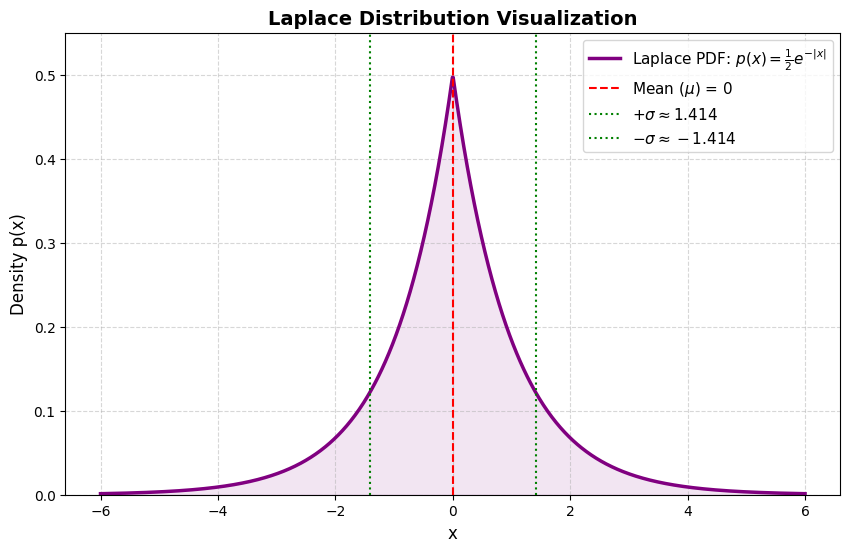

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, exp, Abs, integrate, oo, sqrt

# ==========================================
# PART 1: SYMBOLIC CALCULATION (Exact Math)
# ==========================================
print("--- SYMBOLIC CALCULATION RESULTS ---")

# 1. Define the symbol x and the PDF function
x = symbols('x')
pdf = 0.5 * exp(-Abs(x))

# 2. Calculate Mean (Expectation)
# Formula: Integral of x * p(x) from -infinity to +infinity
mean_sym = integrate(x * pdf, (x, -oo, oo))
print(f"Calculated Mean (mu): {mean_sym}")

# 3. Calculate Variance
# Formula: Integral of x^2 * p(x) (since mean is 0)
# Note: Var(X) = E[X^2] - (E[X])^2
expected_x_sq = integrate(x**2 * pdf, (x, -oo, oo))
variance_sym = expected_x_sq - mean_sym**2
print(f"Calculated Variance (sigma^2): {variance_sym}")

# 4. Calculate Standard Deviation
std_dev_sym = sqrt(variance_sym)
print(f"Calculated Std Dev (sigma): {std_dev_sym}")
print(f"Numerical value of Std Dev: {float(std_dev_sym):.4f}")
print("-" * 30)


# ==========================================
# PART 2: VISUALIZATION
# ==========================================

# 1. Prepare data points
# Generate 1000 points between -6 and 6
x_vals = np.linspace(-6, 6, 1000)
# Calculate p(x) for each point
y_vals = 0.5 * np.exp(-np.abs(x_vals))

# 2. Setup the plot
plt.figure(figsize=(10, 6))

# Plot the Laplace PDF
plt.plot(x_vals, y_vals, label=r'Laplace PDF: $p(x) = \frac{1}{2}e^{-|x|}$', 
         color='purple', linewidth=2.5)

# Fill the area under the curve
plt.fill_between(x_vals, y_vals, color='purple', alpha=0.1)

# Add a line for the Mean
plt.axvline(x=0, color='red', linestyle='--', label=f'Mean ($\\mu$) = 0')

# Add lines for Standard Deviation (Mean +/- Sigma)
sigma_val = np.sqrt(2) # approx 1.414
plt.axvline(x=sigma_val, color='green', linestyle=':', label=r'$+\sigma \approx 1.414$')
plt.axvline(x=-sigma_val, color='green', linestyle=':', label=r'$-\sigma \approx -1.414$')

# 3. Decorate the chart
plt.title('Laplace Distribution Visualization', fontsize=14, fontweight='bold')
plt.xlabel('x', fontsize=12)
plt.ylabel('Density p(x)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=11)
plt.ylim(0, 0.55) # Set y-limit slightly above max value (0.5)

plt.show()

## Exercise 3
> I walk up to you on the street and say “I have a random variable with mean 1, standard deviation 2, and I observed 25% of my samples taking a value larger than 9". Do you believe me? Why or why not?

### Step-by-step computation

**Step 1:** We use Chebyshev's Inequality by the formula $(22.6.20)$: 
$$P\left(X \notin [\mu_X - \alpha\sigma_X, \mu_X + \alpha\sigma_X]\right) \le \frac{1}{\alpha^2}$$
**Step 2:** Given Parameters:
- Mean ($\mu$) = 1
- Standard Deviation ($\sigma$) = 2
- Observed Event: $X > 9$ with probability $P(X > 9) = 0.25$ (25%).

**Step 3:** Calculate Distance: How far is the value 9 from the mean?
$$9 - \mu = 9 - 1 = 8$$
So, the value 9 is 4 standard deviations away from the mean ($4\sigma$).

**Step 4:** Apply Chebyshev's Inequality:
Formula: $P(|X - \mu| \ge k\sigma) \le \frac{1}{k^2}$
With $k=4$:$$P(|X - 1| \ge 8) \le \frac{1}{4^2} = \frac{1}{16} = 0.0625$$
This means the probability of a value falling outside the range $[1-8, 1+8]$ (i.e., $X \le -7$ or $X \ge 9$) is at most 6.25%.

**Step 5:** Conclusion: The person claims to observe 25% of data greater than 9. However, theoretically, the probability for $X \ge 9$ cannot exceed 6.25%.Since $25\% > 6.25\%$, this claim contradicts statistical laws.

$\Rightarrow$ Answer: No, I do not believe you. The observed percentage is too high compared to the theoretical limit.

### Python Implementation

In [13]:
def check_chebyshev(mean, std_dev, observed_val, claimed_prob):
    # Calculate k (number of standard deviations)
    distance = observed_val - mean
    k = distance / std_dev
    
    # Calculate Chebyshev limit (theoretical max probability)
    # P(|X - mean| >= k*sigma) <= 1/k^2
    theoretical_max_prob = 1 / (k**2)
    
    print(f"Distance from {observed_val} to mean {mean} is: {distance}")
    print(f"Number of standard deviations (k): {k}")
    print(f"According to Chebyshev, max prob P(X >= {observed_val}) is: {theoretical_max_prob:.4f} ({theoretical_max_prob*100}%)")
    print(f"Person's claimed probability: {claimed_prob} ({claimed_prob*100}%)")
    
    if claimed_prob > theoretical_max_prob:
        print("CONCLUSION: Cannot be believed (Statistically impossible).")
    else:
        print("CONCLUSION: Believable.")

# Run with problem parameters
check_chebyshev(mean=1, std_dev=2, observed_val=9, claimed_prob=0.25)

Distance from 9 to mean 1 is: 8
Number of standard deviations (k): 4.0
According to Chebyshev, max prob P(X >= 9) is: 0.0625 (6.25%)
Person's claimed probability: 0.25 (25.0%)
CONCLUSION: Cannot be believed (Statistically impossible).


## Exercise 4: 
> Suppose that you have two random variables $X, Y$, with joint density given by $p_{XY}(x, y) = 4xy$ for $x, y \in [0, 1]$ and $p_{XY}(x, y) = 0$ otherwise. What is the covariance of $X$ and $Y$?

### Step-by-step computation

**Step 1:** Apply the formula $(22.6.39)$ for Covariance: $$\text{Cov}(X, Y) = E[XY] - E[X]E[Y]$$
**Step 2:** Calculate $E[XY]$:
$$E[XY] = \int_{0}^{1} \int_{0}^{1} (xy) \cdot p(x,y) \, dx \, dy= \int_{0}^{1} \int_{0}^{1} (xy) \cdot (4xy) \, dx \, dy= \int_{0}^{1} \int_{0}^{1} 4x^2y^2 \, dx \, dy$$
$$E[XY] = 4 \left( \int_{0}^{1} x^2 dx \right) \left( \int_{0}^{1} y^2 dy \right) = 4 \cdot \left[ \frac{x^3}{3} \right]_0^1 \cdot \left[ \frac{y^3}{3} \right]_0^1 = 4 \cdot \frac{1}{3} \cdot \frac{1}{3} = \frac{4}{9}$$
**Step 3:** Find Marginal Density to get $E[X]$:
$$p_X(x) = \int_{0}^{1} 4xy \, dy = 4x \left[ \frac{y^2}{2} \right]_0^1 = 4x \cdot \frac{1}{2} = 2x$$
(By symmetry, $p_Y(y) = 2y$)

**Step 4:** Calculate $E[X]$ and $E[Y]$:
$$E[X] = \int_{0}^{1} x \cdot p_X(x) \, dx = \int_{0}^{1} x \cdot (2x) \, dx = \int_{0}^{1} 2x^2 \, dx$$
$$E[X] = \left[ \frac{2x^3}{3} \right]_0^1 = \frac{2}{3}$$
Similarly, $E[Y] = \frac{2}{3}$.

**Step 5:** Calculate Covariance:
$$\text{Cov}(X, Y) = E[XY] - E[X]E[Y]$$
$$\text{Cov}(X, Y) = \frac{4}{9} - \left( \frac{2}{3} \cdot \frac{2}{3} \right)= \frac{4}{9} - \frac{4}{9} = 0$$
### Python Implementation

In [14]:
from sympy import symbols, integrate

def calculate_covariance():
    # Define symbols
    x, y = symbols('x y')
    
    # Joint PDF
    p_xy = 4 * x * y
    
    # 1. Calculate E[XY] = double integral of (x*y * p(x,y))
    # Integrating dx from 0->1, dy from 0->1
    E_xy = integrate(integrate(x * y * p_xy, (x, 0, 1)), (y, 0, 1))
    
    # 2. Calculate E[X]
    # First find marginal p_x(x) by integrating p(x,y) with respect to y
    p_x = integrate(p_xy, (y, 0, 1))
    # Then calculate E[X] = integral(x * p_x)
    E_x = integrate(x * p_x, (x, 0, 1))
    
    # 3. Calculate E[Y] (Similar to E[X] due to symmetry)
    p_y = integrate(p_xy, (x, 0, 1))
    E_y = integrate(y * p_y, (y, 0, 1))
    
    # 4. Calculate Covariance
    cov_xy = E_xy - (E_x * E_y)
    
    print(f"--- Question 4 Analysis ---")
    print(f"E[XY] = {E_xy}")
    print(f"E[X]  = {E_x}")
    print(f"E[Y]  = {E_y}")
    print(f"Cov(X, Y) = E[XY] - E[X]E[Y] = {E_xy} - {E_x}*{E_y}")
    print(f"RESULT: Covariance = {cov_xy}")

calculate_covariance()

--- Question 4 Analysis ---
E[XY] = 4/9
E[X]  = 2/3
E[Y]  = 2/3
Cov(X, Y) = E[XY] - E[X]E[Y] = 4/9 - 2/3*2/3
RESULT: Covariance = 0


# 12.  References 

<div id="ref-1">
    <b>[1]</b> Zhang, A., et al. (2023). <i>Dive into Deep Learning</i>. Cambridge University Press. 
    <a href="https://D2L.ai">D2L.ai</a>
</div>

<div id="ref-2">
    <b>[2]</b> Helwig, N. E. (2020). <i>Random Variables</i>. University of Minnesota.
    <a href="http://users.stat.umn.edu/~helwig/notes/RandomVariables.pdf?zarsrc=410&utm_source=zalo&utm_medium=zalo&utm_campaign=zalo">RandomVariables.pdf</a>
</div>

<div id="ref-3">
    <b>[3]</b> "Marginal distribution", <i> wikipedia.
    <a href="https://en.wikipedia.org/wiki/Marginal_distribution">Marginal distribution</a>
</div>

<div id="ref-4">
    <b>[4]</b> "Covariance", <i> wikipedia.
    <a href="https://en.wikipedia.org/wiki/Covariance">Covariance</a>
</div>
<div id="ref-5">
    <b>[5]</b> "Correlation", <i> wikipedia.
    <a href="https://en.wikipedia.org/wiki/Correlation">Correlation</a>
</div>